Importing relevent libraries and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
baseStation = pd.read_csv('Dataset/BSinfo.csv')
energy = pd.read_csv('Dataset/ECdata.csv')
esmodes = pd.read_csv('Dataset/CLdata.csv')

Defining helper functions

In [5]:
def plotLineGraph(x,y,xlabel,ylabel,title):
    plt.plot(x, y, marker='o', linestyle='-', color='b')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.grid(True)
    for a, b in zip(x, y):
        plt.annotate(text=str(b), xy=(a, b), xytext=(10, 5), textcoords='offset points', ha='center')
    plt.title(title)
    plt.show()


Exploring baseStation dataset

In [6]:
baseStation

BS CellName RUType   Mode  Frequency  Bandwidth  Antennas   TXpower
0       B_0    Cell0  Type1  Mode2    365.000         20         4  6.875934
1       B_1    Cell0  Type2  Mode2    532.000         20         4  6.875934
2       B_2    Cell0  Type1  Mode2    365.000         20         4  6.875934
3       B_3    Cell0  Type2  Mode2    532.000         20         4  6.875934
4       B_4    Cell0  Type2  Mode2    532.000         20         4  6.875934
...     ...      ...    ...    ...        ...        ...       ...       ...
1212  B_925    Cell1  Type8  Mode1    697.002         10         4  7.877728
1213  B_105    Cell2  Type1  Mode2    426.980          2         2  6.877429
1214  B_745    Cell2  Type1  Mode2    426.980          2         2  6.877429
1215  B_105    Cell3  Type1  Mode2    426.980          2         2  6.877429
1216  B_745    Cell3  Type1  Mode2    426.980          2         2  6.877429

[1217 rows x 8 columns]

In [7]:
# BS: Base Station

print(baseStation['BS'].nunique())
print(baseStation['BS'].unique())

# 1020 base stations are available.

1020
['B_0' 'B_1' 'B_2' ... 'B_1017' 'B_1018' 'B_1019']


12
RUType
Type1     401
Type4     231
Type6     199
Type7     116
Type5      67
Type3      49
Type11     36
Type2      35
Type9      27
Type12     22
Type10     21
Type8      13
Name: count, dtype: int64


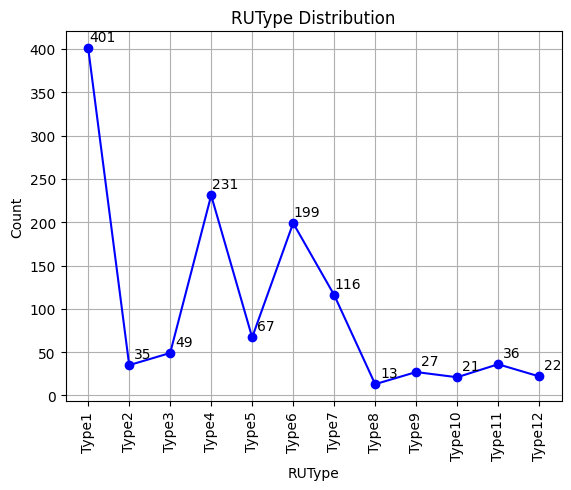

In [8]:
# RUTypes

print(baseStation['RUType'].nunique())
print(baseStation['RUType'].value_counts())

plotLineGraph(baseStation['RUType'].unique(), baseStation['RUType'].value_counts(sort=False), 'RUType', 'Count', 'RUType Distribution')

# # count plot
# plt.figure(figsize=(10, 6))
# sns.countplot(x='RUType', data=baseStation)
# plt.title('RUType vs. Count')
# plt.show()

# line plot
# plt.plot(baseStation['RUType'].unique(), baseStation['RUType'].value_counts(sort=False), marker='o', linestyle='-', color='b', label='RUType')
# plt.xlabel('RUType')
# plt.ylabel('Count')
# plt.xticks(rotation=90)
# plt.grid(True)
# for x, y in zip(baseStation['RUType'].unique(), baseStation['RUType'].value_counts(sort=False)):
#     plt.annotate(text=str(y), xy=(x, y), xytext=(10, 5), textcoords='offset points', ha='center')
# plt.title('RUType Distribution')
# plt.show()

In [8]:
# Avg Energy per RUType

In [9]:
# Modes

print(baseStation['Mode'].unique())

['Mode2' 'Mode1']


In [10]:
# Frequency

frequency = pd.DataFrame(baseStation['Frequency'].value_counts())
# sort dataframe by Frequency column
frequency.sort_values(by=['Frequency'], inplace=True)
frequency.reset_index(inplace=True)

frequency
# plot a bar chart with frequency and count using matplotlib.plypot

# plt.figure(figsize=(10, 5))
# plt.bar(frequency['count'], frequency['Frequency'])
# plt.xlabel('Frequency')
# plt.ylabel('Count')
# plt.title('Frequency Distribution')
# plt.grid(True)
# plt.show()

# line plot
plt.figure(figsize=(15, 5))
plt.plot(frequency['Frequency'],frequency['count'], marker='o', linestyle='-', color='b',)
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.grid(True)
for x, y in zip(frequency['Frequency'],frequency['count']):
    plt.annotate(text=(x,y), xy=(x, y), xytext=(0,7), textcoords='offset points', ha='center')
plt.title('Frequency  Distribution')
plt.show()


KeyError: 'count'

<Figure size 1500x500 with 0 Axes>

In [11]:
# Bandwidth

print(baseStation['Bandwidth'].unique())
# print(baseStation['Bandwidth'].value_counts())

bandwidth = pd.DataFrame(baseStation['Bandwidth'].value_counts())
bandwidth.sort_values(by=['Bandwidth'], inplace=True)
bandwidth.reset_index(inplace=True)

# plt.figure(figsize=(10, 5))
# plt.bar(bandwidth['Bandwidth'], bandwidth['count'])
# plt.xlabel('Bandwidth')
# plt.ylabel('Count')
# plt.xticks(bandwidth['Bandwidth'])
# for i in range(len(bandwidth)):
#     plt.text(x=bandwidth['Bandwidth'][i], y=bandwidth['count'][i] + 5, s=bandwidth['count'][i], ha='center')
# plt.title('Bandwidth')
# plt.show()


plt.figure(figsize=(10, 5))
num_bars = len(bandwidth)
bar_interval = 2
x_values = np.arange(0, num_bars * bar_interval, bar_interval)
plt.bar(x_values, bandwidth['count'])
plt.xlabel('Bandwidth')
plt.ylabel('Count')
plt.title('Bandwidth')
plt.xticks(x_values, bandwidth['Bandwidth'])
for x, y in zip(x_values, bandwidth['count']):
    plt.text(x, y + 5, str(y), ha='center')
plt.show()

[20 10  5  2  8]


KeyError: 'count'

<Figure size 1000x500 with 0 Axes>

In [12]:
print(baseStation['Antennas'].unique())
print(baseStation['Antennas'].value_counts())

antennas = pd.DataFrame(baseStation['Antennas'].value_counts())
antennas.sort_values(by=['Antennas'], inplace=True)
antennas.reset_index(inplace=True)
plt.figure(figsize=(10, 5))
num_bars = len(antennas)
bar_interval = 1
x_values = np.arange(0, num_bars * bar_interval, bar_interval)

plt.bar(x_values, antennas['count'])
plt.xlabel('Antennas')
plt.ylabel('Count')
plt.title('Antennas')
plt.xticks(x_values, antennas['Antennas'])
for x, y in zip(x_values, antennas['count']):
    plt.text(x, y + 10, str(y), ha='center')
plt.show()

[ 4  2  1  8 32 64]
2     949
1      99
4      82
8      44
64     22
32     21
Name: Antennas, dtype: int64


KeyError: 'count'

<Figure size 1000x500 with 0 Axes>

[6.87593423 6.42750374 5.97907324 6.12855007 5.68011958 6.57698057
 5.38116592 5.94917788 6.7264574  6.39760837 6.41255605 6.68161435
 6.98056801 6.53213752 8.37533632 7.32585949 8.04648729 7.5980568
 8.03617339 7.32152466 8.03452915 7.31629297 7.91659193 7.88744395
 7.8916293  8.03273543 6.69192825 7.88206278 7.10134529 6.37279522
 8.01330344 7.31838565 7.32571002 7.31943199 7.08639761 7.32750374
 7.32361734 6.877429   6.76158445 7.34424514 7.34020927 7.33617339
 7.55007474 7.87772795]


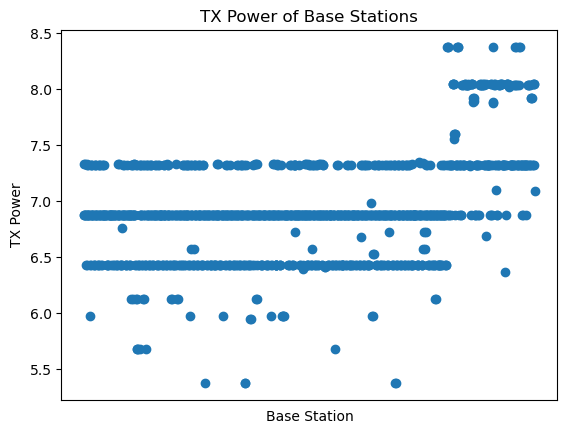

In [15]:
print(baseStation['TXpower'].unique())

plt.scatter(baseStation['BS'], baseStation['TXpower'])
plt.xlabel('Base Station')
plt.ylabel('TX Power')
plt.xticks([])
plt.title('TX Power of Base Stations')
plt.show()

Exploring energy dataset

In [17]:
energy['Time'] = pd.to_datetime(energy['Time'])
energy

Time      BS     Energy
0     2023-01-01 01:00:00     B_0  64.275037
1     2023-01-01 02:00:00     B_0  55.904335
2     2023-01-01 03:00:00     B_0  57.698057
3     2023-01-01 04:00:00     B_0  55.156951
4     2023-01-01 05:00:00     B_0  56.053812
...                   ...     ...        ...
92624 2023-01-02 17:00:00  B_1018  14.648729
92625 2023-01-02 18:00:00  B_1018  14.648729
92626 2023-01-02 21:00:00  B_1018  13.452915
92627 2023-01-02 22:00:00  B_1018  13.602392
92628 2023-01-02 23:00:00  B_1018  13.303438

[92629 rows x 3 columns]

In [18]:
print(energy['BS'].nunique())
print(energy['BS'].unique())

923
['B_0' 'B_1' 'B_2' 'B_3' 'B_4' 'B_5' 'B_6' 'B_7' 'B_8' 'B_9' 'B_10' 'B_11'
 'B_12' 'B_14' 'B_15' 'B_16' 'B_17' 'B_18' 'B_19' 'B_20' 'B_21' 'B_22'
 'B_23' 'B_24' 'B_25' 'B_26' 'B_27' 'B_28' 'B_29' 'B_30' 'B_31' 'B_32'
 'B_33' 'B_34' 'B_35' 'B_36' 'B_37' 'B_38' 'B_39' 'B_40' 'B_41' 'B_42'
 'B_43' 'B_44' 'B_45' 'B_46' 'B_47' 'B_48' 'B_49' 'B_50' 'B_51' 'B_52'
 'B_53' 'B_54' 'B_55' 'B_56' 'B_57' 'B_58' 'B_59' 'B_60' 'B_61' 'B_62'
 'B_63' 'B_64' 'B_65' 'B_66' 'B_67' 'B_68' 'B_69' 'B_70' 'B_71' 'B_72'
 'B_73' 'B_74' 'B_75' 'B_76' 'B_77' 'B_78' 'B_79' 'B_80' 'B_81' 'B_82'
 'B_83' 'B_84' 'B_85' 'B_86' 'B_87' 'B_88' 'B_89' 'B_90' 'B_91' 'B_92'
 'B_93' 'B_94' 'B_95' 'B_96' 'B_97' 'B_98' 'B_99' 'B_100' 'B_101' 'B_102'
 'B_103' 'B_104' 'B_105' 'B_106' 'B_107' 'B_108' 'B_109' 'B_110' 'B_111'
 'B_112' 'B_113' 'B_114' 'B_115' 'B_116' 'B_117' 'B_118' 'B_119' 'B_120'
 'B_121' 'B_122' 'B_123' 'B_124' 'B_125' 'B_126' 'B_127' 'B_128' 'B_129'
 'B_130' 'B_131' 'B_132' 'B_133' 'B_134' 'B_135' 'B_136' 'B_

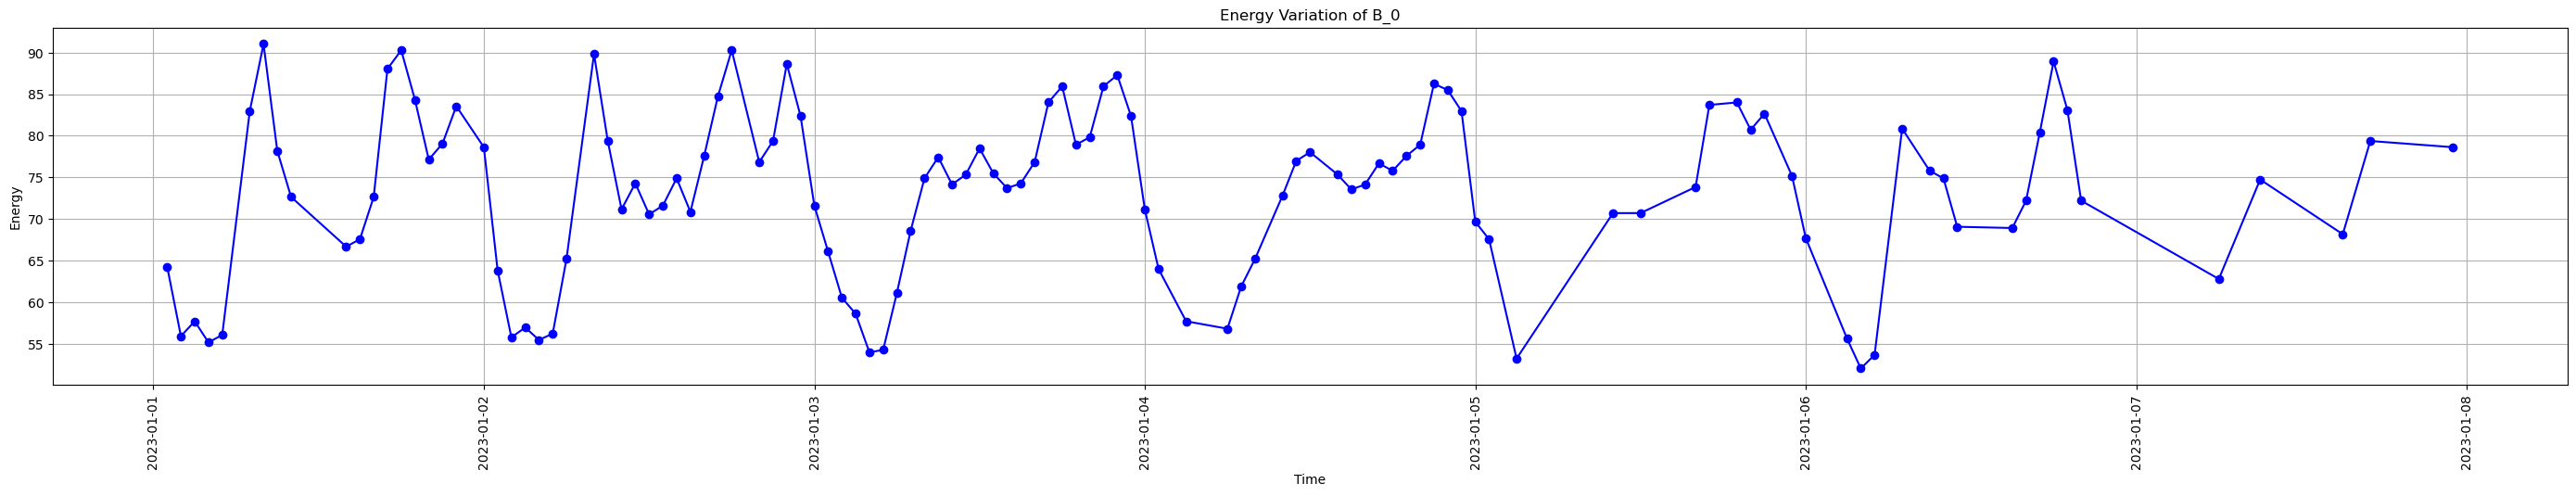

In [19]:
B_0 = energy[energy['BS']=="B_0"]

plt.figure(figsize=(35, 5))
plt.plot(B_0['Time'],B_0['Energy'], marker='o', linestyle='-', color='b',)
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Energy')
plt.grid(True)
plt.title('Energy Variation of B_0')
plt.show()


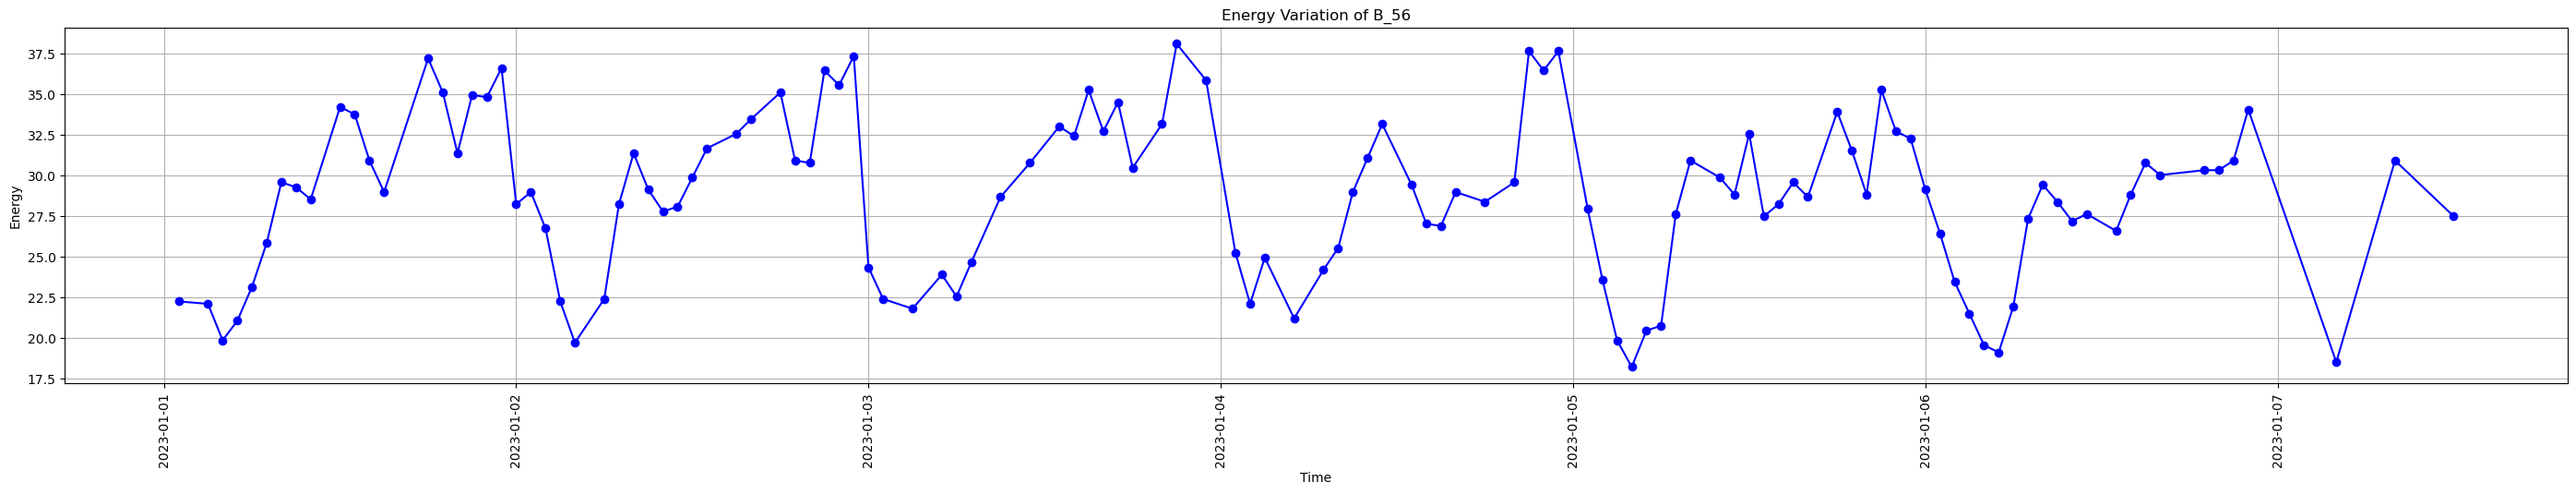

In [21]:
B_56 = energy[energy['BS']=="B_56"]

plt.figure(figsize=(35, 5))
plt.plot(B_56['Time'],B_56['Energy'], marker='o', linestyle='-', color='b',)
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Energy')
plt.grid(True)
plt.title('Energy Variation of B_56')
plt.show()

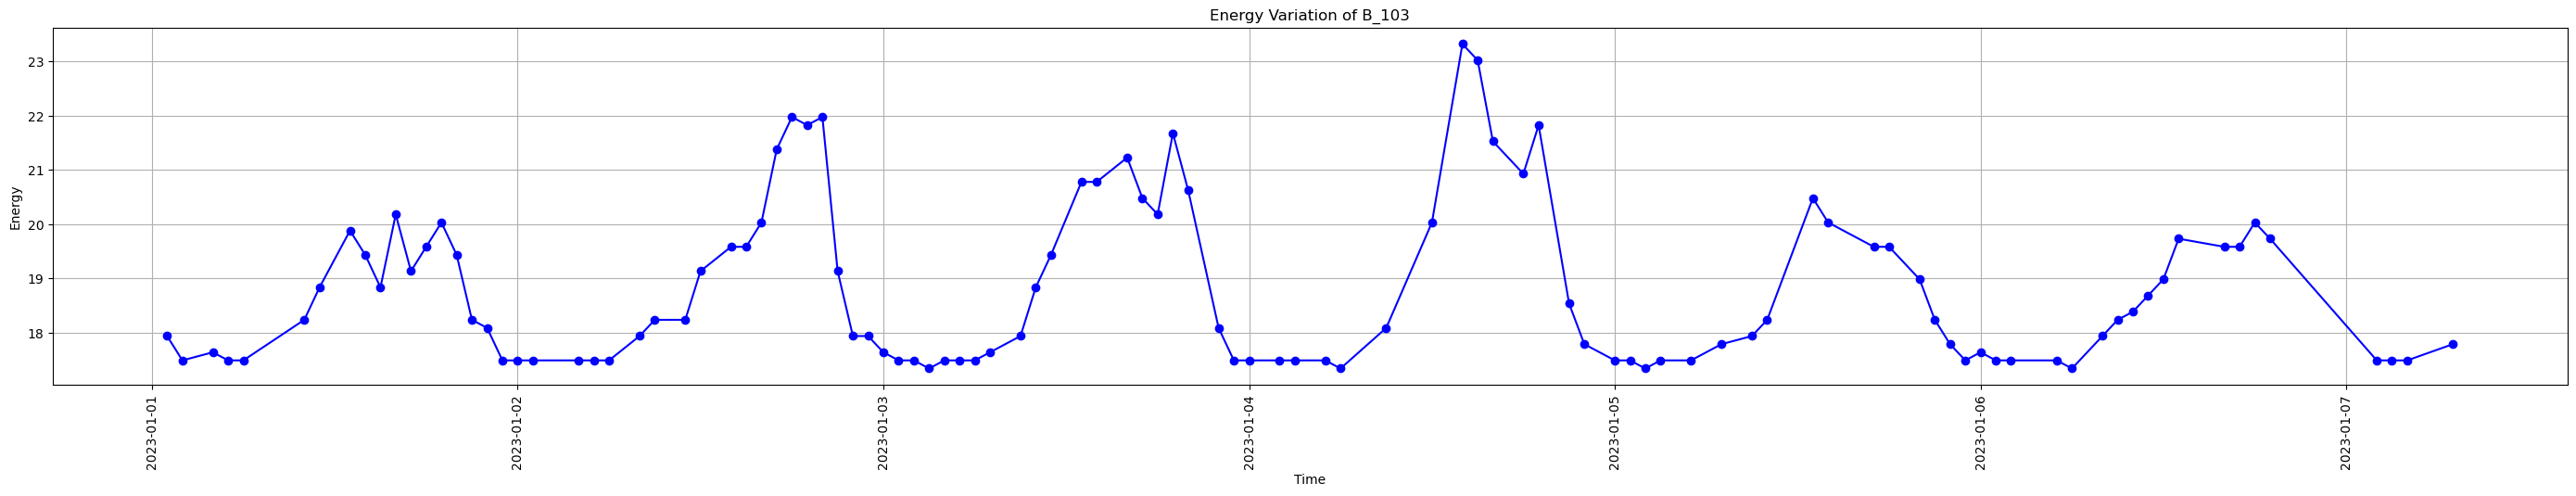

In [22]:
B_103 = energy[energy['BS']=="B_103"]

plt.figure(figsize=(35, 5))
plt.plot(B_103['Time'],B_103['Energy'], marker='o', linestyle='-', color='b',)
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Energy')
plt.grid(True)
plt.title('Energy Variation of B_103')
plt.show()

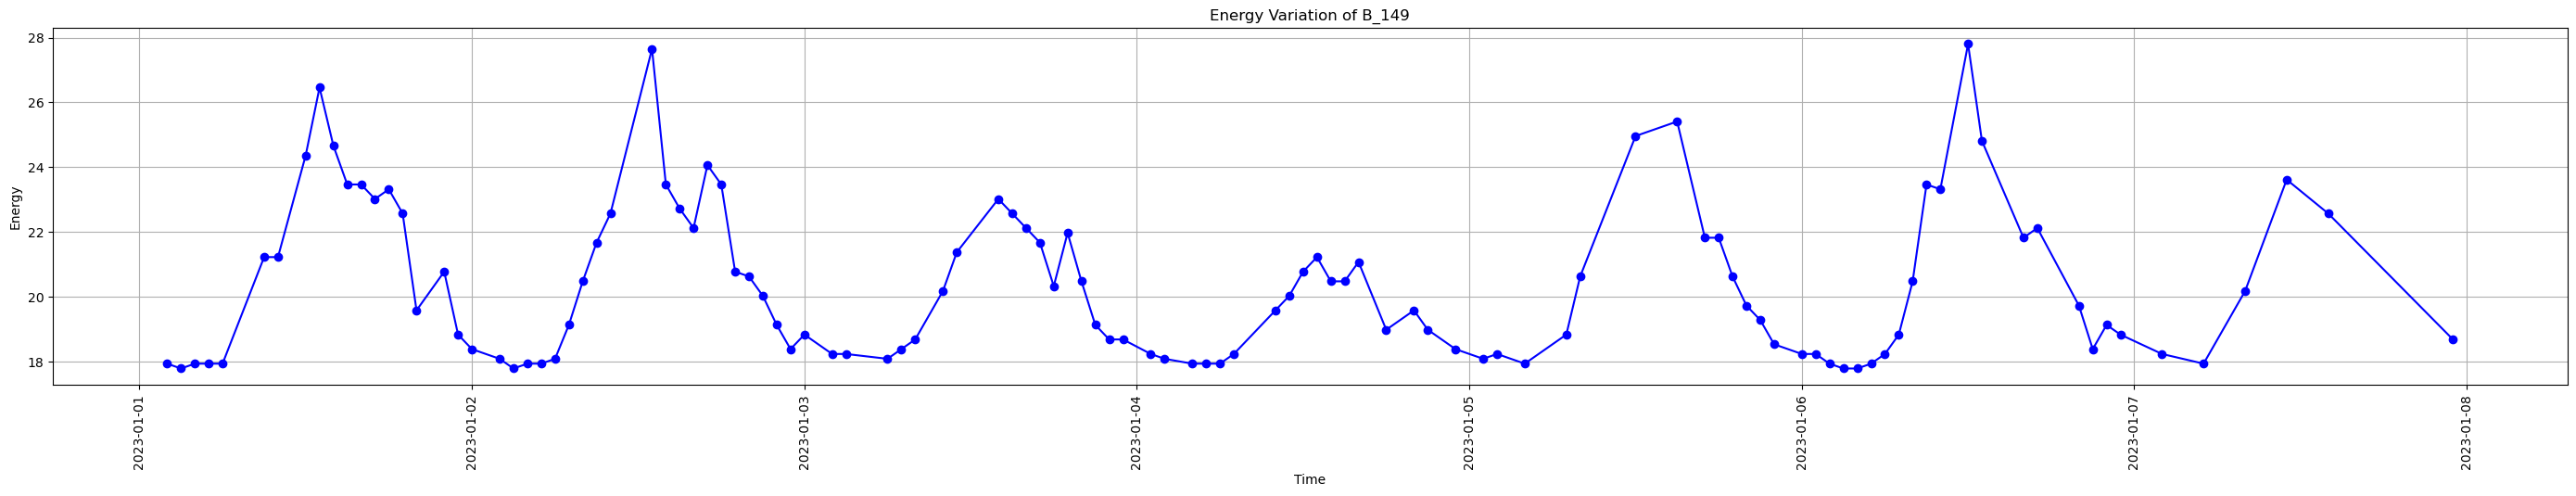

In [23]:
B_149 = energy[energy['BS']=="B_149"]

plt.figure(figsize=(35, 5))
plt.plot(B_149['Time'],B_149['Energy'], marker='o', linestyle='-', color='b',)
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Energy')
plt.grid(True)
plt.title('Energy Variation of B_149')
plt.show()

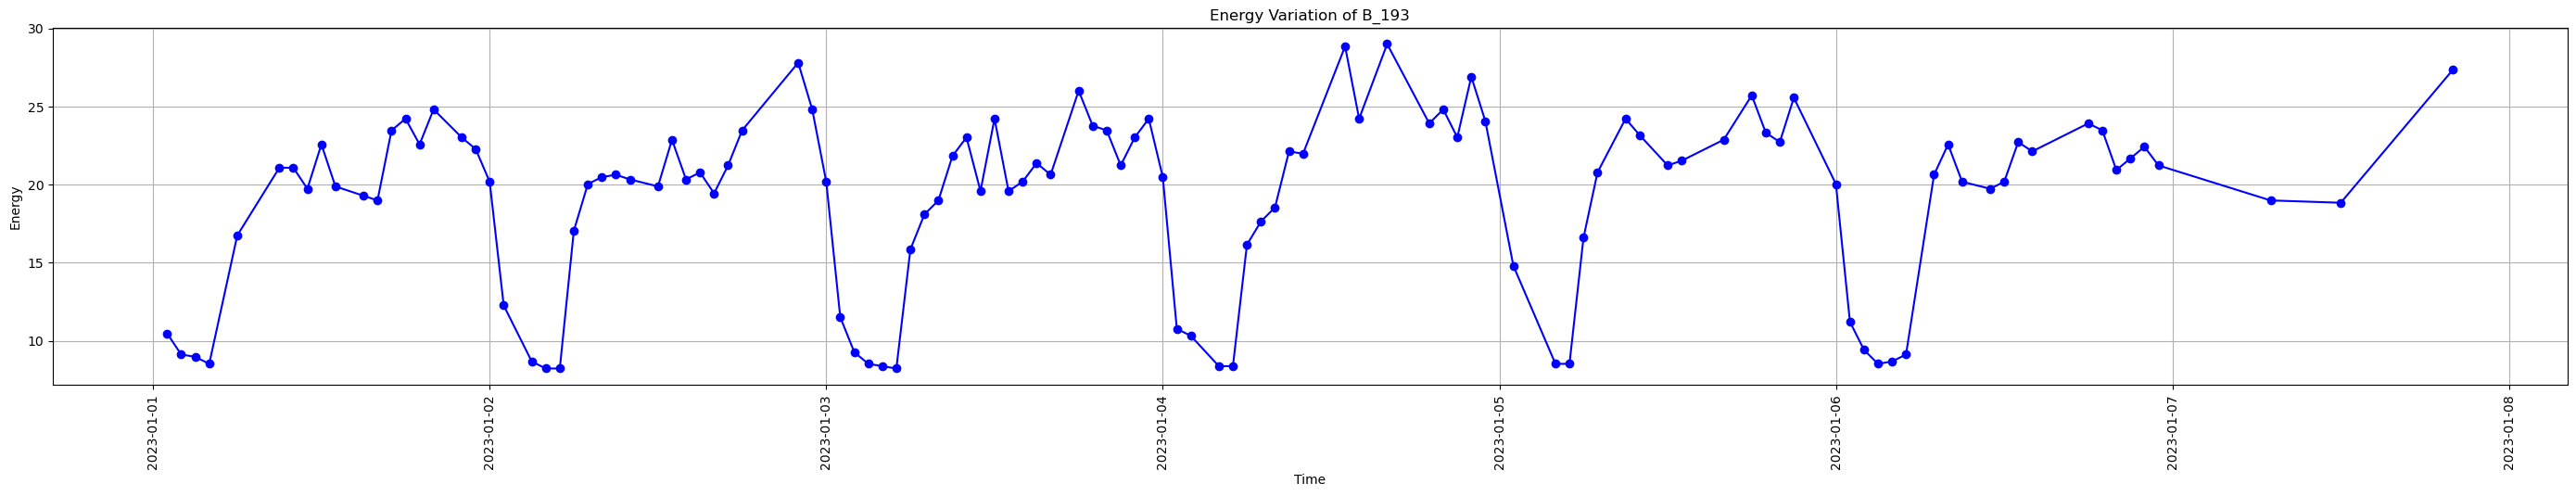

In [24]:
B_193 = energy[energy['BS']=="B_193"]

plt.figure(figsize=(35, 5))
plt.plot(B_193['Time'],B_193['Energy'], marker='o', linestyle='-', color='b',)
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Energy')
plt.grid(True)
plt.title('Energy Variation of B_193')
plt.show()

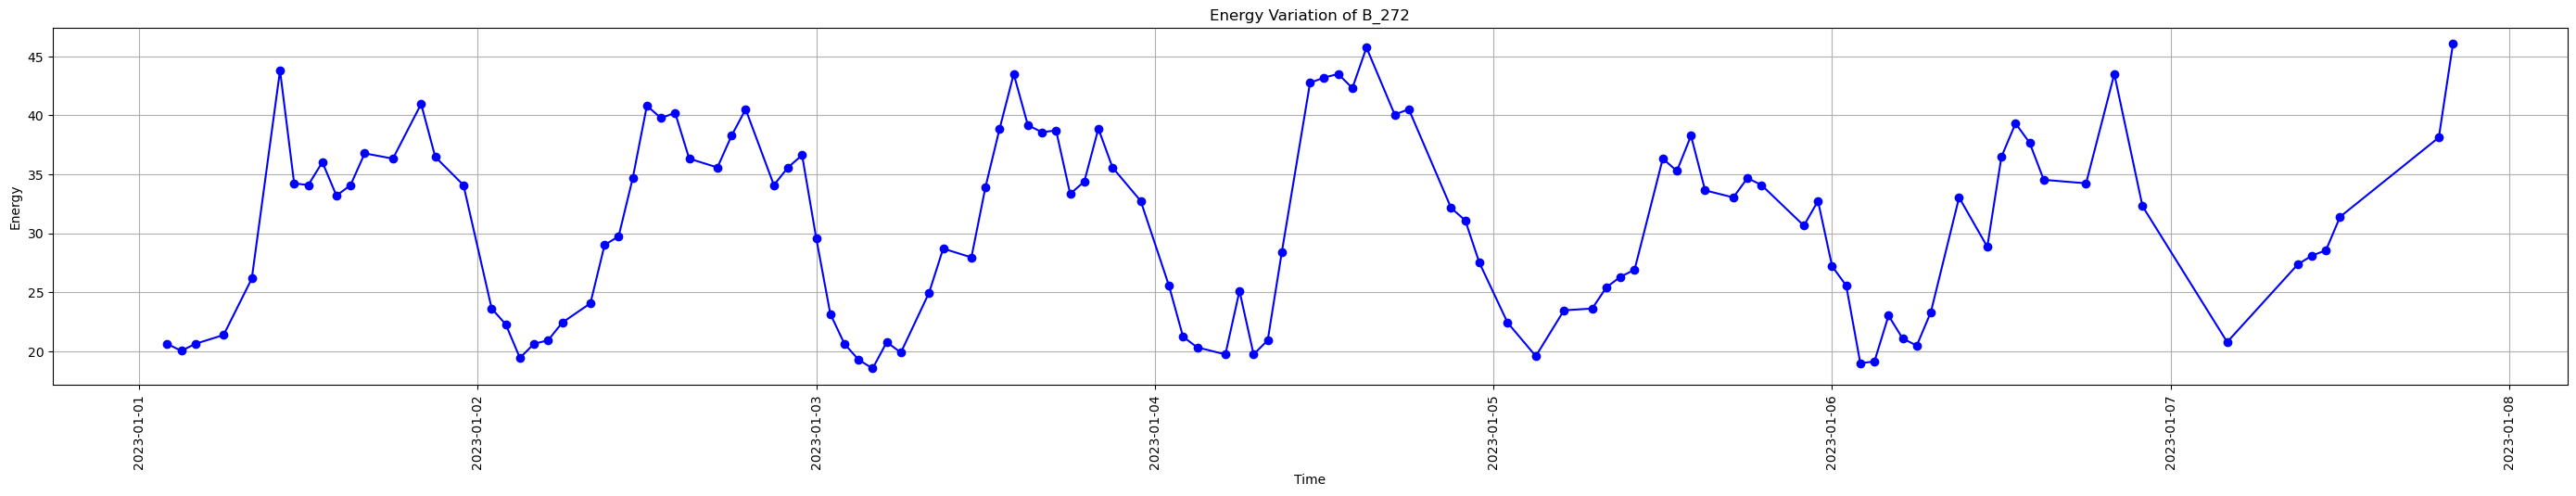

In [25]:
B_272 = energy[energy['BS']=="B_272"]

plt.figure(figsize=(35, 5))
plt.plot(B_272['Time'],B_272['Energy'], marker='o', linestyle='-', color='b',)
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Energy')
plt.grid(True)
plt.title('Energy Variation of B_272')
plt.show()

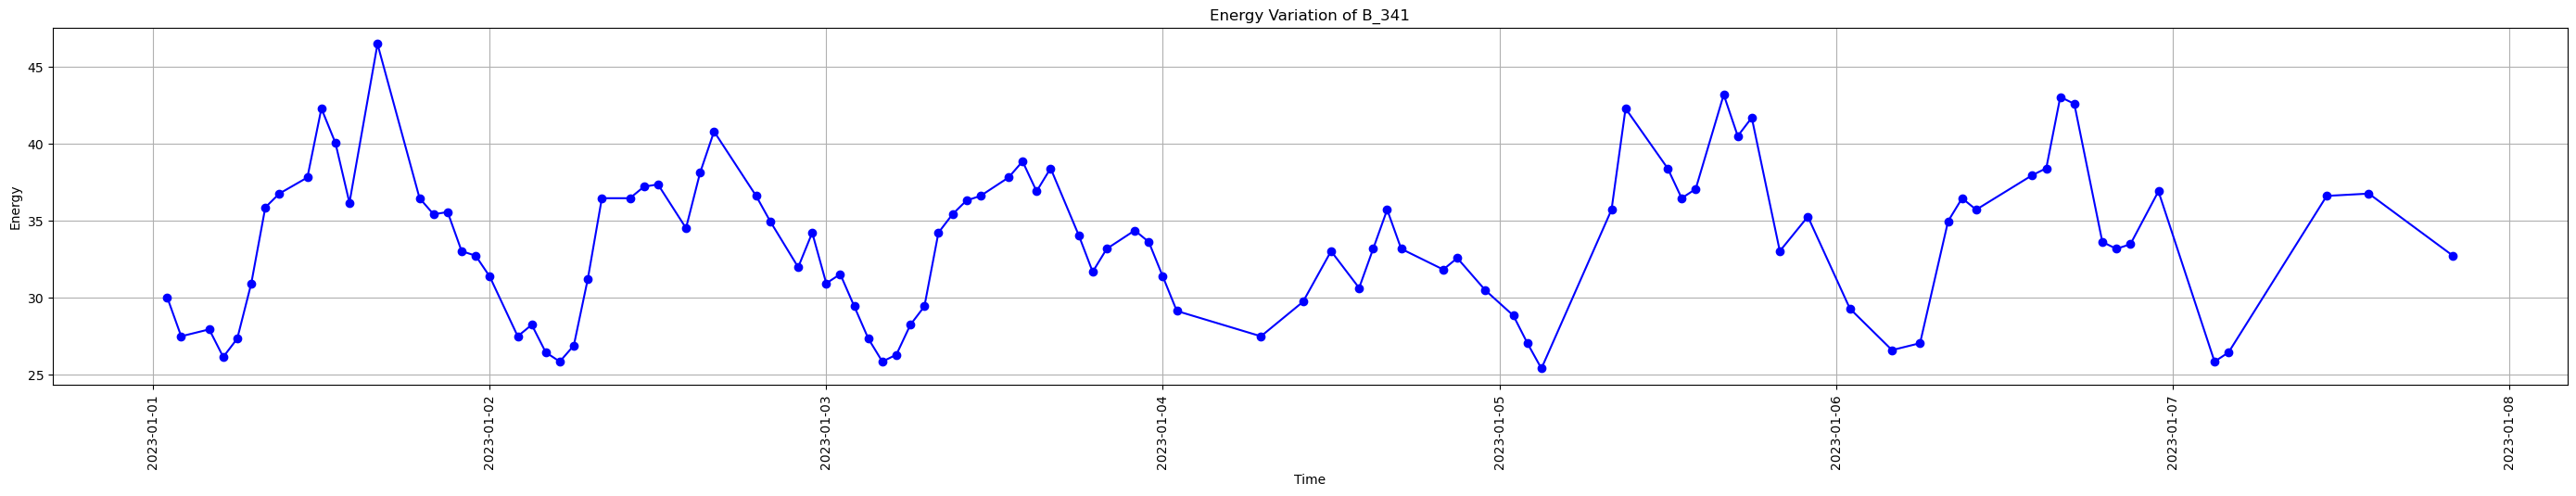

In [26]:
B_341 = energy[energy['BS']=="B_341"]

plt.figure(figsize=(35, 5))
plt.plot(B_341['Time'],B_341['Energy'], marker='o', linestyle='-', color='b',)
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Energy')
plt.grid(True)
plt.title('Energy Variation of B_341')
plt.show()

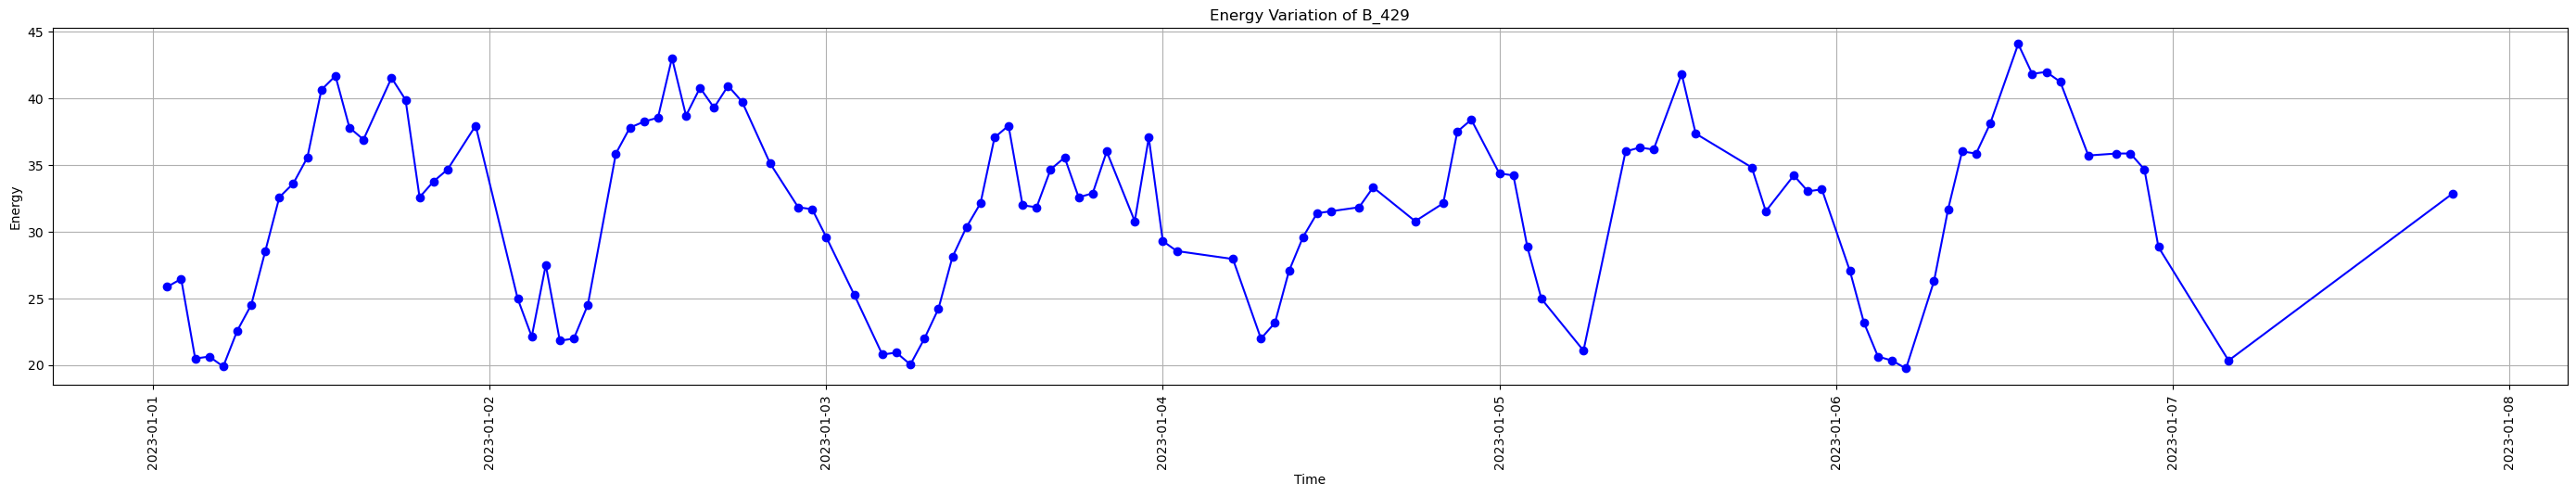

In [27]:
B_429 = energy[energy['BS']=="B_429"]

plt.figure(figsize=(35, 5))
plt.plot(B_429['Time'],B_429['Energy'], marker='o', linestyle='-', color='b',)
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Energy')
plt.grid(True)
plt.title('Energy Variation of B_429')
plt.show()

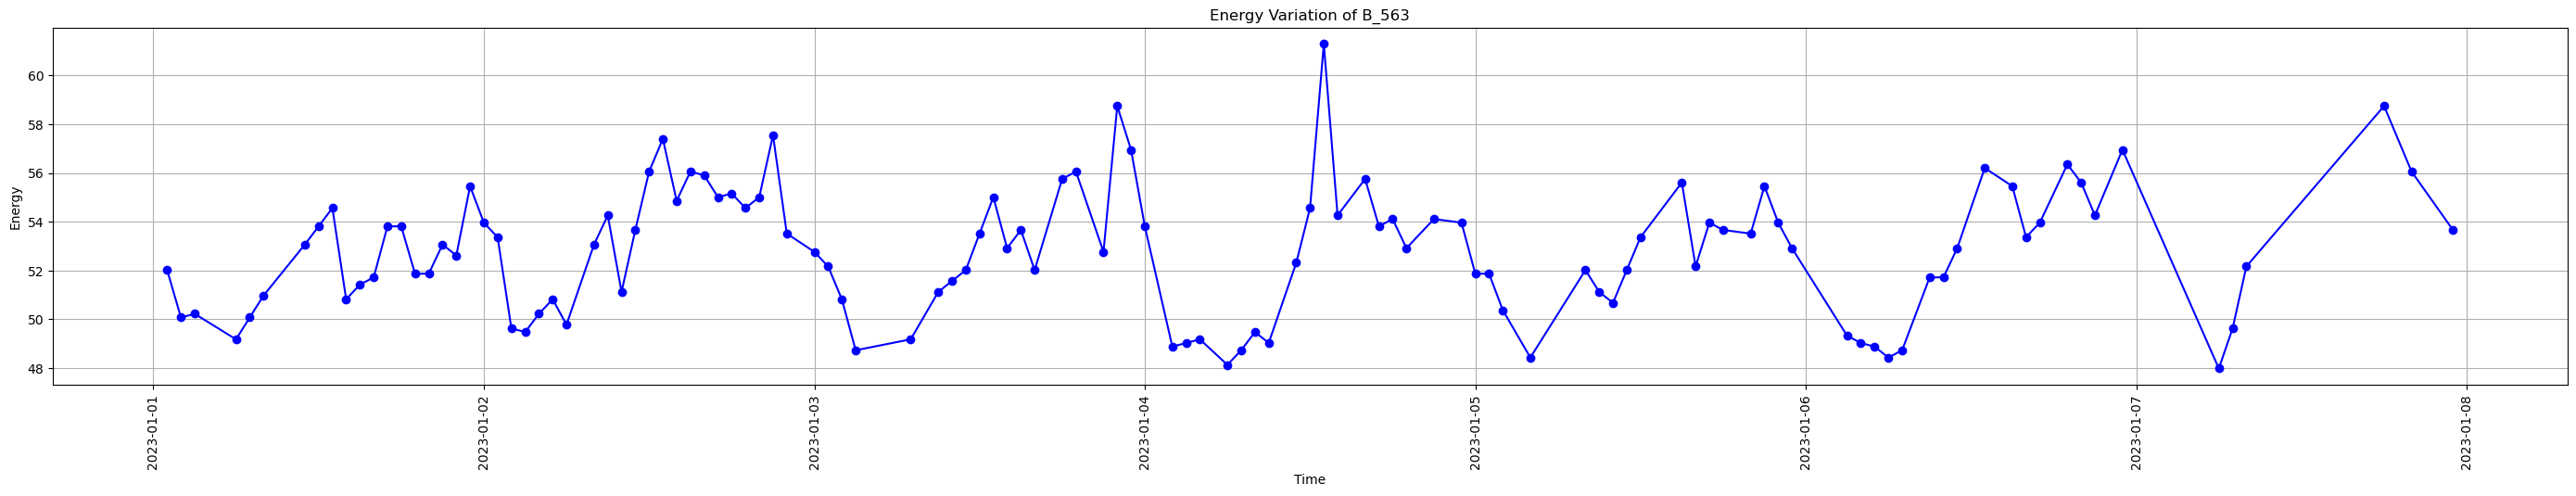

In [28]:
B_563 = energy[energy['BS']=="B_563"]

plt.figure(figsize=(35, 5))
plt.plot(B_563['Time'],B_563['Energy'], marker='o', linestyle='-', color='b',)
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Energy')
plt.grid(True)
plt.title('Energy Variation of B_563')
plt.show()

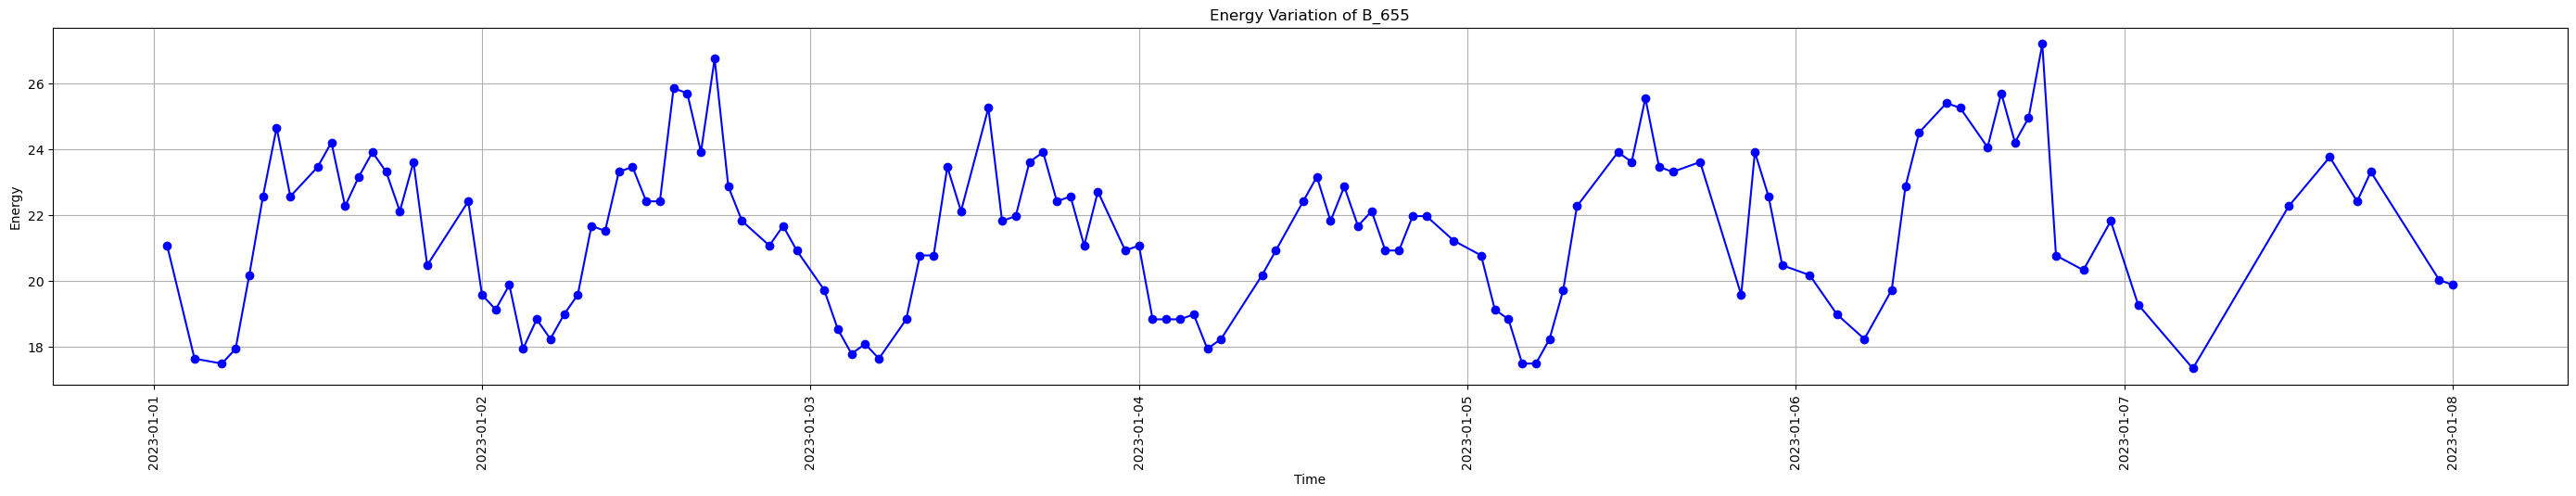

In [29]:
B_655 = energy[energy['BS']=="B_655"]

plt.figure(figsize=(35, 5))
plt.plot(B_655['Time'],B_655['Energy'], marker='o', linestyle='-', color='b',)
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Energy')
plt.grid(True)
plt.title('Energy Variation of B_655')
plt.show()

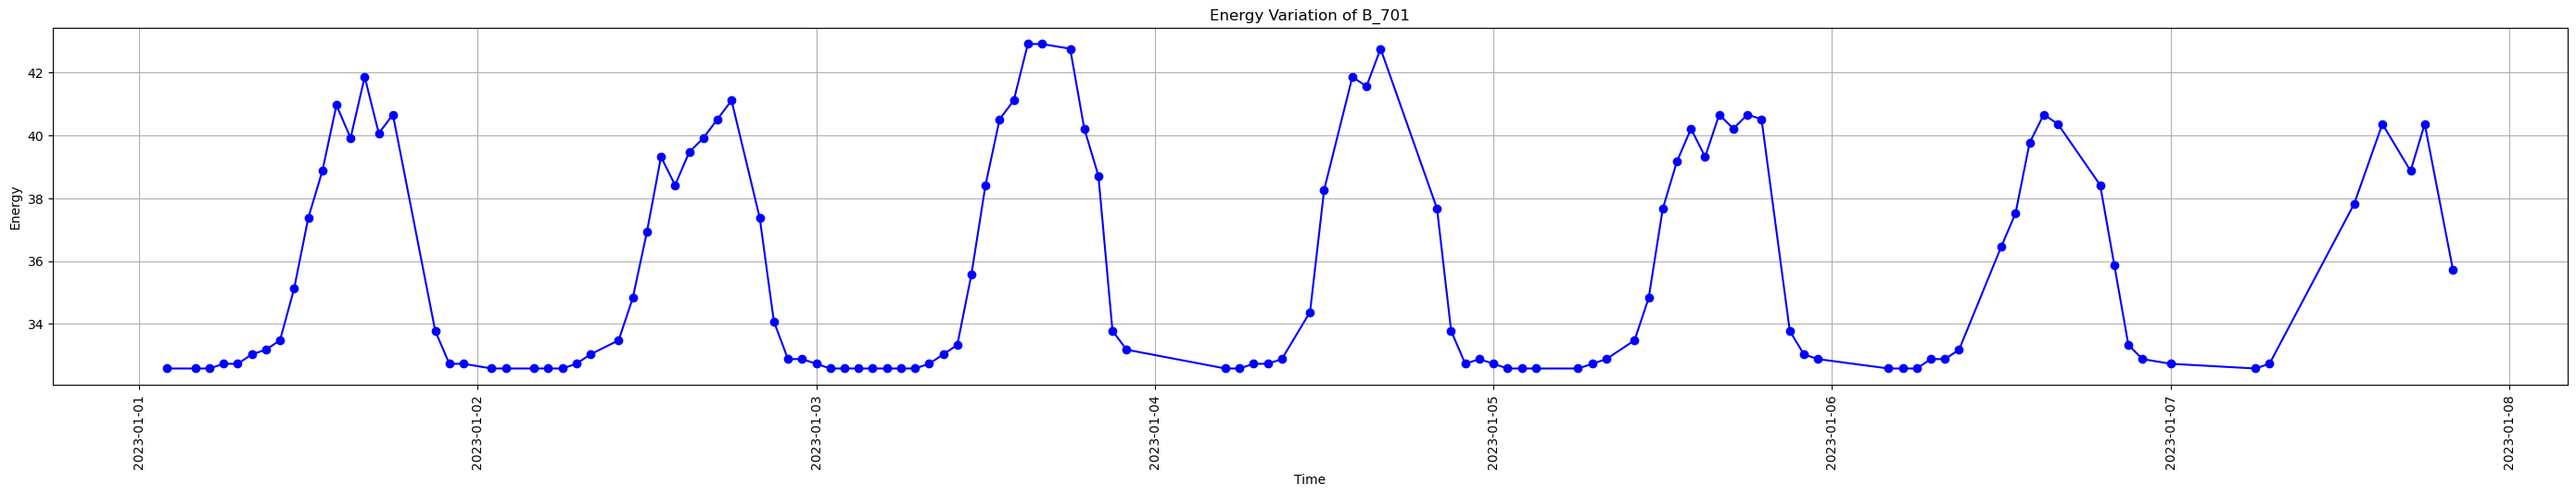

In [30]:
B_701 = energy[energy['BS']=="B_701"]

plt.figure(figsize=(35, 5))
plt.plot(B_701['Time'],B_701['Energy'], marker='o', linestyle='-', color='b',)
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Energy')
plt.grid(True)
plt.title('Energy Variation of B_701')
plt.show()

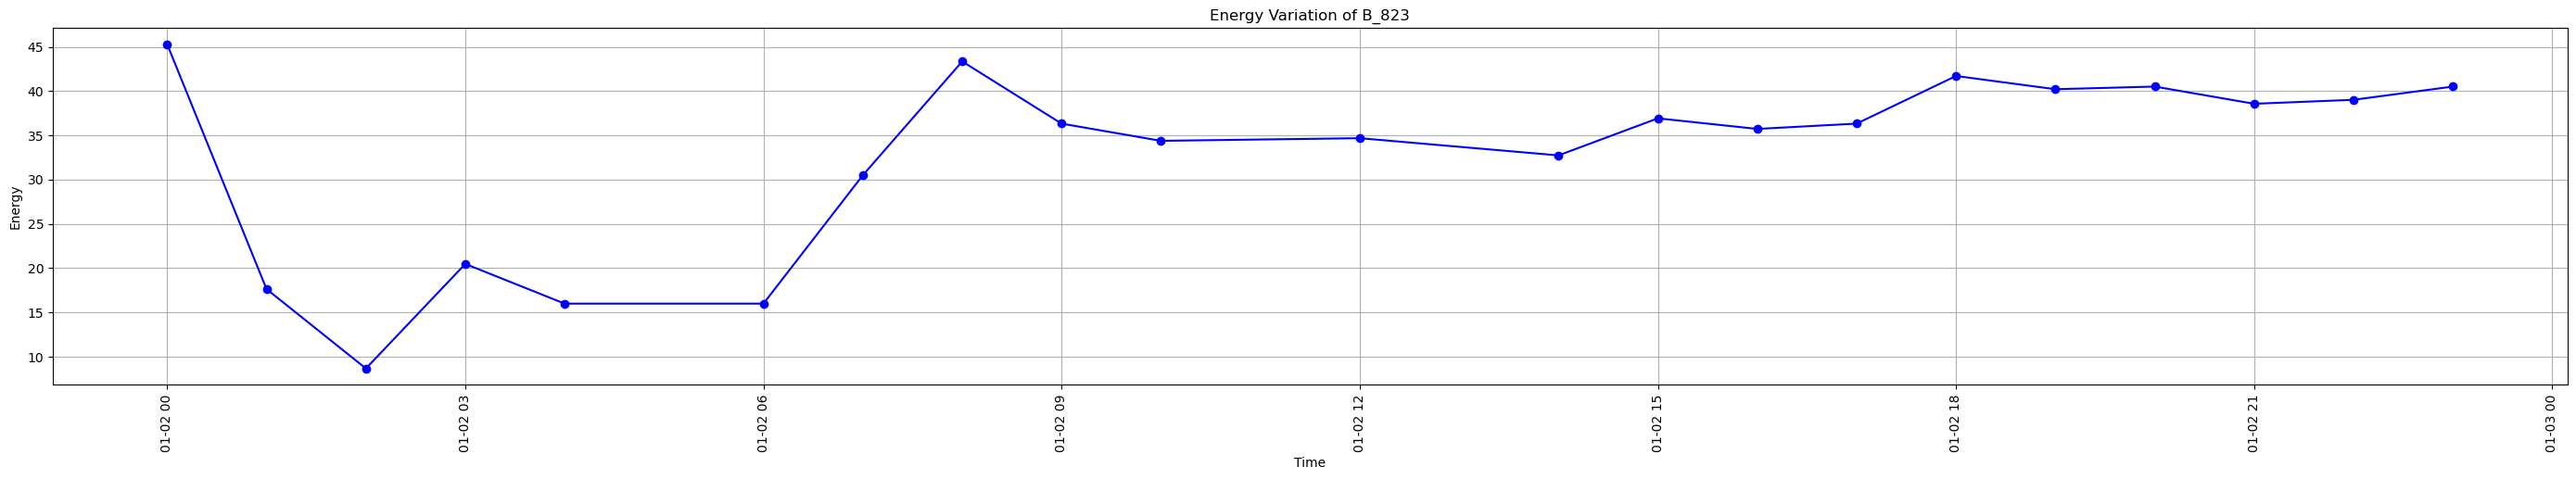

In [31]:
B_823 = energy[energy['BS']=="B_823"]

plt.figure(figsize=(35, 5))
plt.plot(B_823['Time'],B_823['Energy'], marker='o', linestyle='-', color='b',)
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Energy')
plt.grid(True)
plt.title('Energy Variation of B_823')
plt.show()

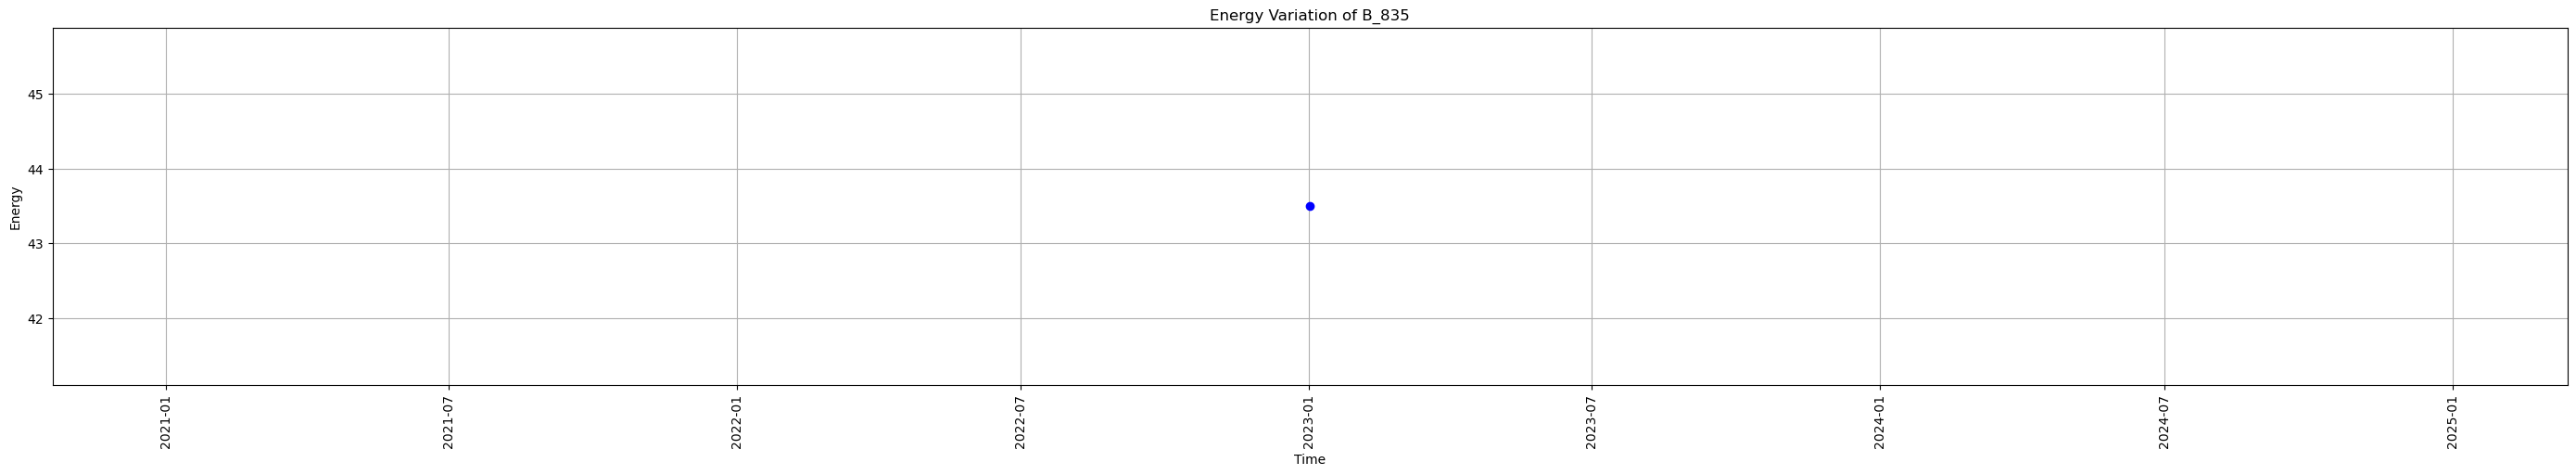

In [32]:
B_835 = energy[energy['BS']=="B_835"]

plt.figure(figsize=(35, 5))
plt.plot(B_835['Time'],B_835['Energy'], marker='o', linestyle='-', color='b',)
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Energy')
plt.grid(True)
plt.title('Energy Variation of B_835')
plt.show()

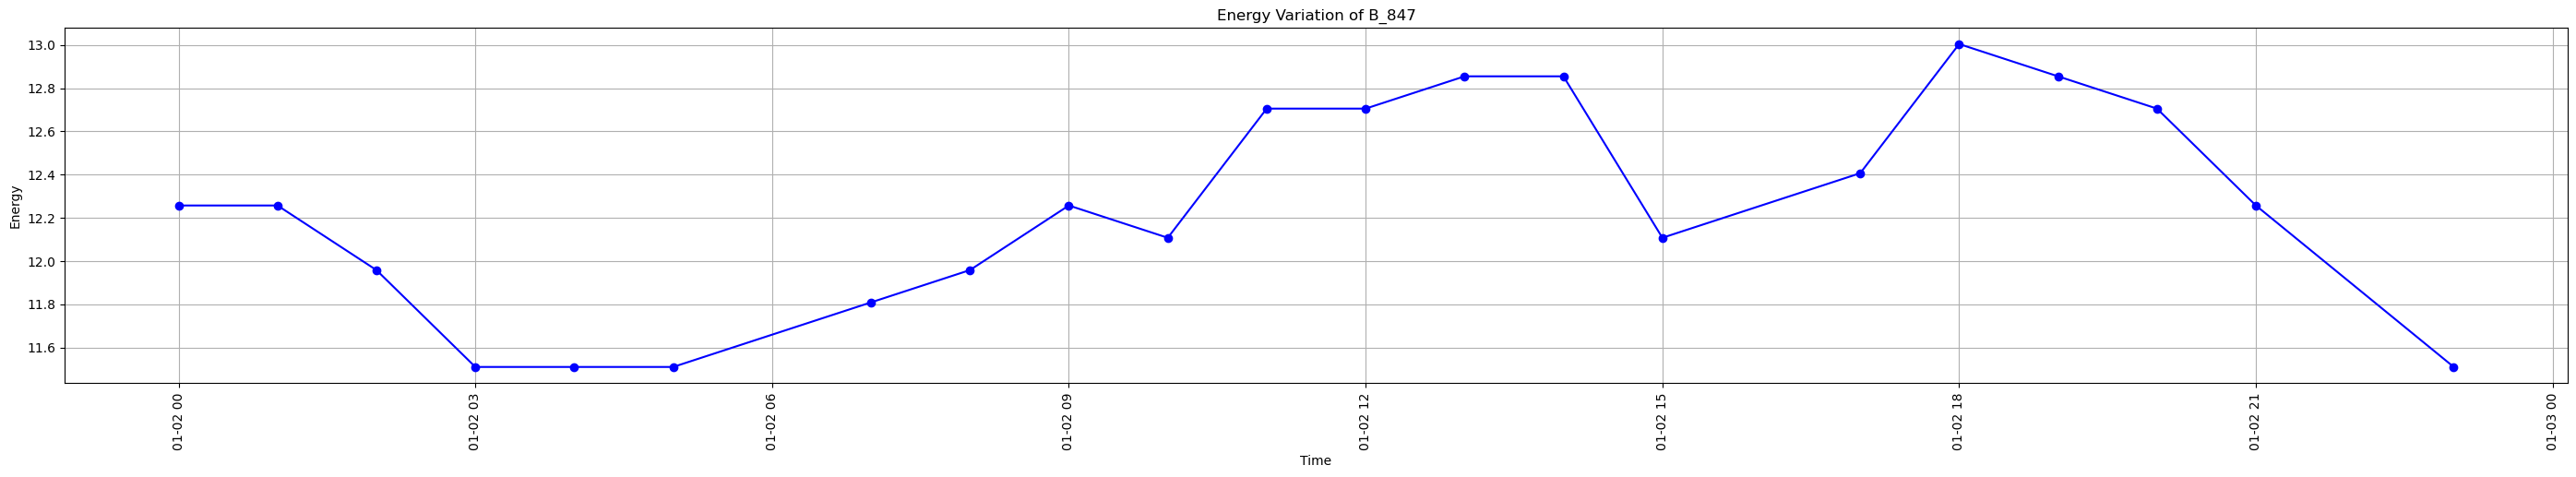

In [33]:
B_847 = energy[energy['BS']=="B_847"]

plt.figure(figsize=(35, 5))
plt.plot(B_847['Time'],B_847['Energy'], marker='o', linestyle='-', color='b',)
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Energy')
plt.grid(True)
plt.title('Energy Variation of B_847')
plt.show()

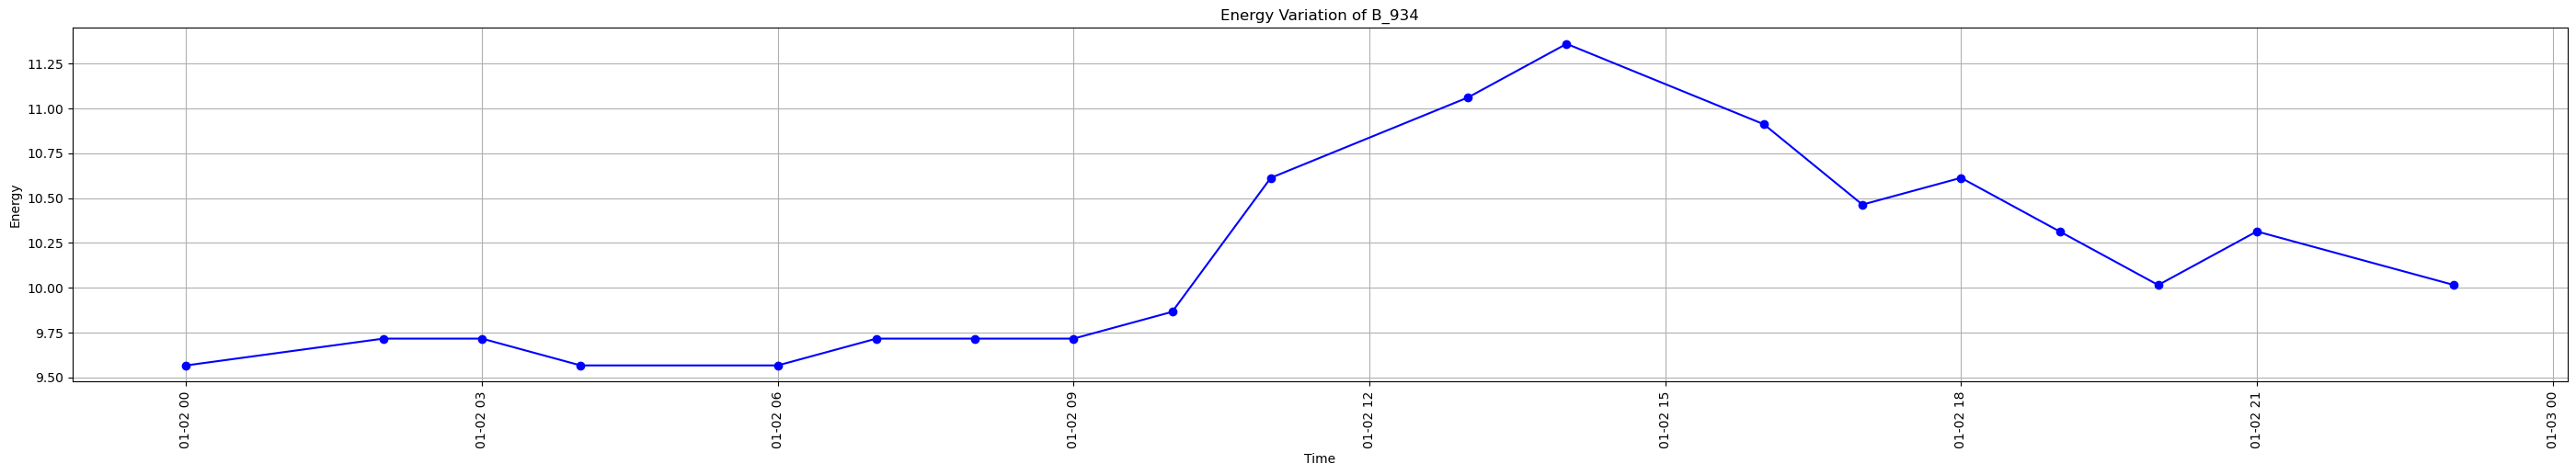

In [34]:
B_934 = energy[energy['BS']=="B_934"]

plt.figure(figsize=(35, 5))
plt.plot(B_934['Time'],B_934['Energy'], marker='o', linestyle='-', color='b',)
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Energy')
plt.grid(True)
plt.title('Energy Variation of B_934')
plt.show()

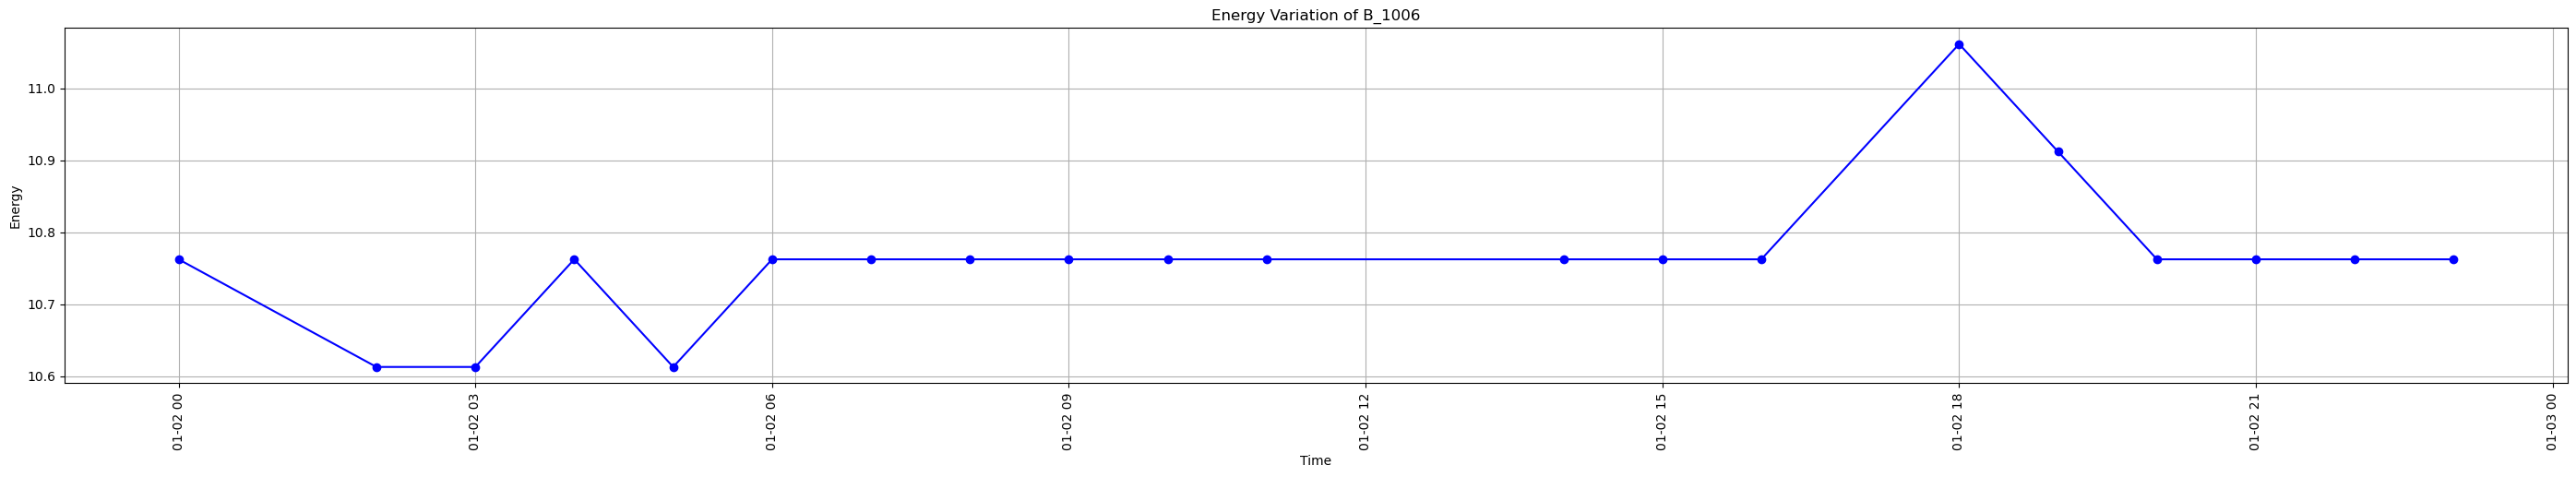

In [35]:
B_1006 = energy[energy['BS']=="B_1006"]

plt.figure(figsize=(35, 5))
plt.plot(B_1006['Time'],B_1006['Energy'], marker='o', linestyle='-', color='b',)
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Energy')
plt.grid(True)
plt.title('Energy Variation of B_1006')
plt.show()

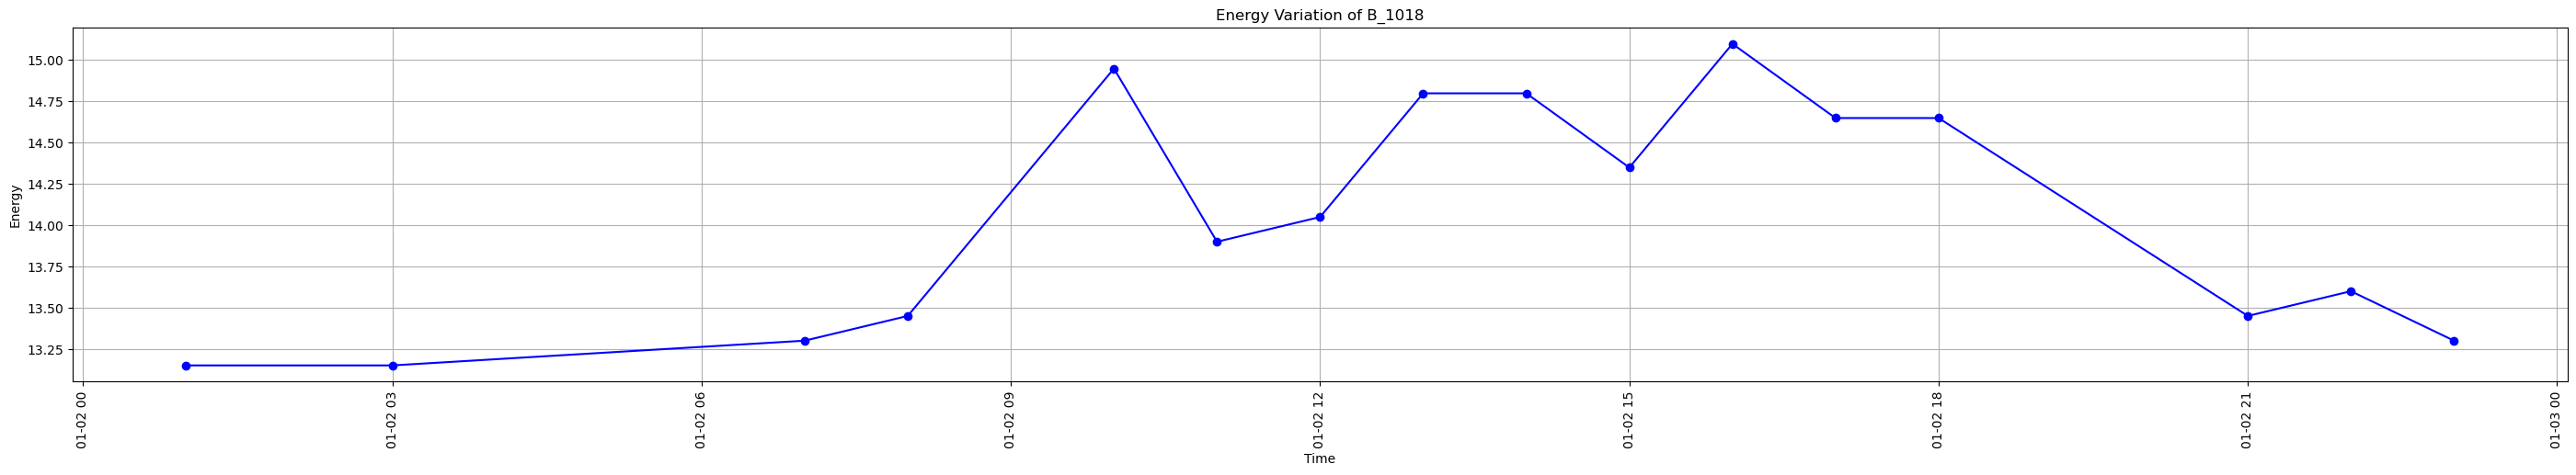

In [36]:
B_1018 = energy[energy['BS']=="B_1018"]

plt.figure(figsize=(35, 5))
plt.plot(B_1018['Time'],B_1018['Energy'], marker='o', linestyle='-', color='b',)
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Energy')
plt.grid(True)
plt.title('Energy Variation of B_1018')
plt.show()

Exploring esmodes dataset

In [37]:
esmodes
esmodes['Time'] = pd.to_datetime(esmodes['Time'])

In [38]:
esmodes.describe()

load        ESMode1        ESMode2        ESMode3   ESMode4  \
count  125575.000000  125575.000000  125575.000000  125575.000000  125575.0   
mean        0.239009       0.040127       0.036722       0.000085       0.0   
std         0.235750       0.189631       0.182238       0.002437       0.0   
min         0.000000       0.000000       0.000000       0.000000       0.0   
25%         0.055080       0.000000       0.000000       0.000000       0.0   
50%         0.153410       0.000000       0.000000       0.000000       0.0   
75%         0.352220       0.000000       0.000000       0.000000       0.0   
max         0.993957       1.000000       1.000000       0.154563       0.0   

             ESMode5        ESMode6  
count  125575.000000  125575.000000  
mean        0.000011       0.038771  
std         0.002803       0.164538  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         0.768070       0.931032

In [39]:
# esmodes['ESMode5'].value_counts()

In [40]:
# temp = esmodes.copy()
# temp.drop(['Time','load','ESMode1','ESMode2','ESMode3','ESMode4','ESMode5','ESMode6'], axis=1, inplace=True)
# temp.drop_duplicates(inplace=True)
# temp[temp['CellName']=='Cell3'].tail(60)
# temp[esmodes['CellName']=='Cell1'].head(60)

In [41]:
# esmodes[esmodes['CellName']=='Cell3']

In [42]:
# esmodes[esmodes['BS']=='B_9'].head(60)

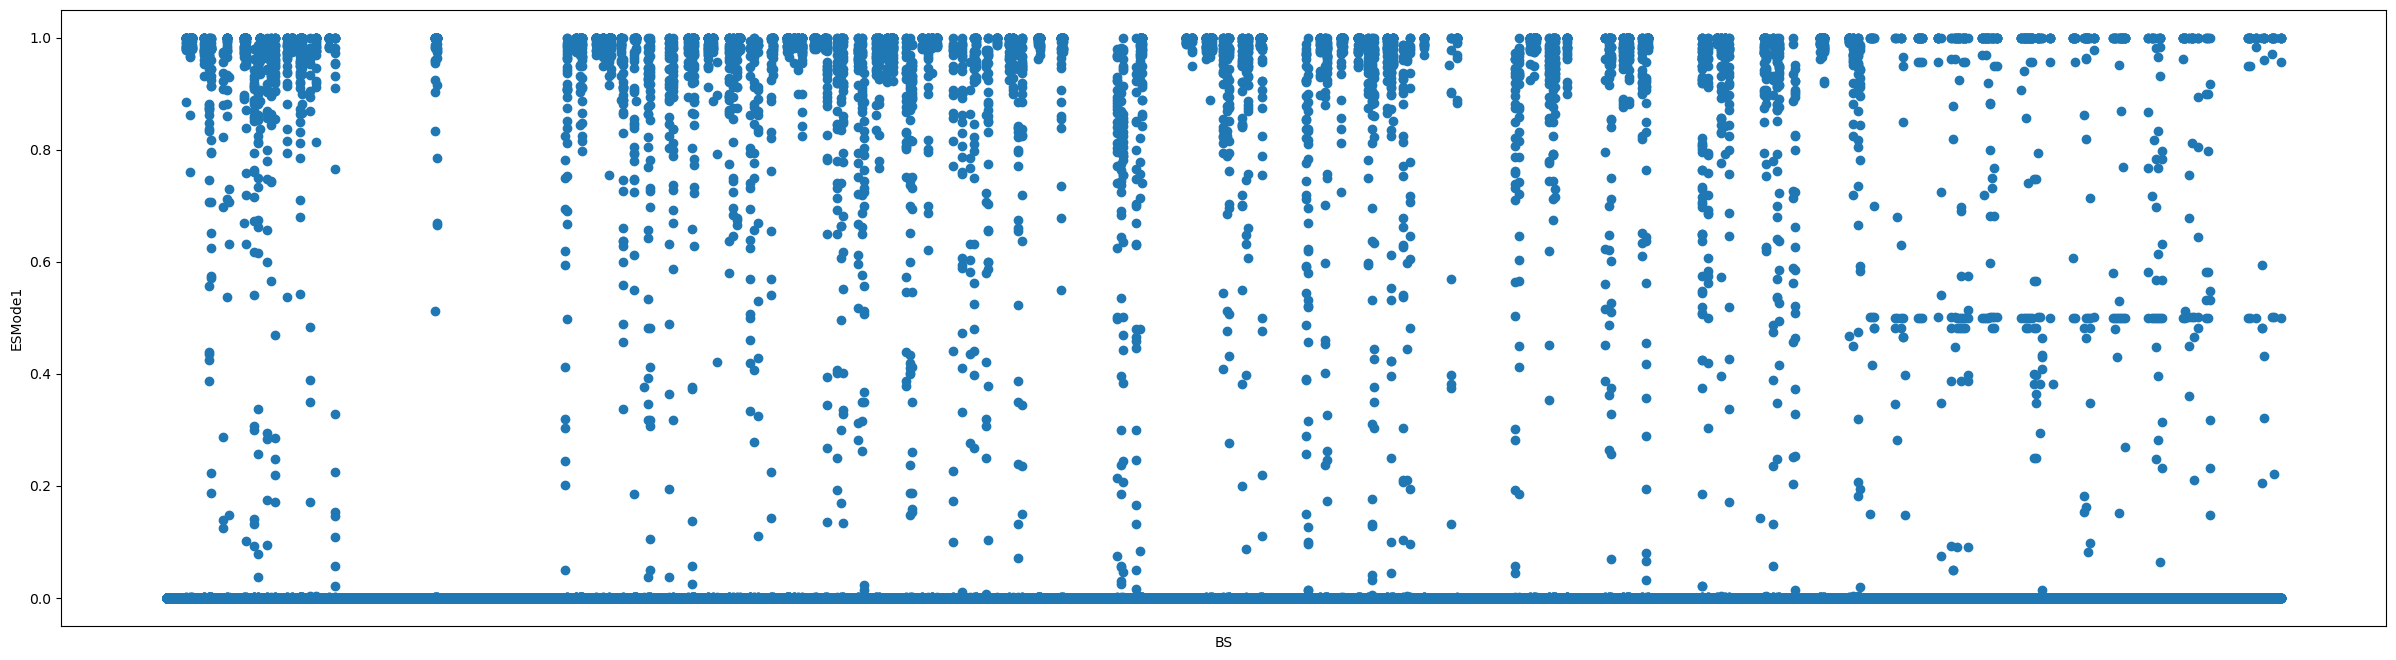

In [43]:
# ESMode1

plt.figure(figsize=(30, 8))
plt.scatter(esmodes['BS'], esmodes['ESMode1'])
plt.xlabel('BS')
plt.xticks([])
plt.ylabel('ESMode1')
plt.show()

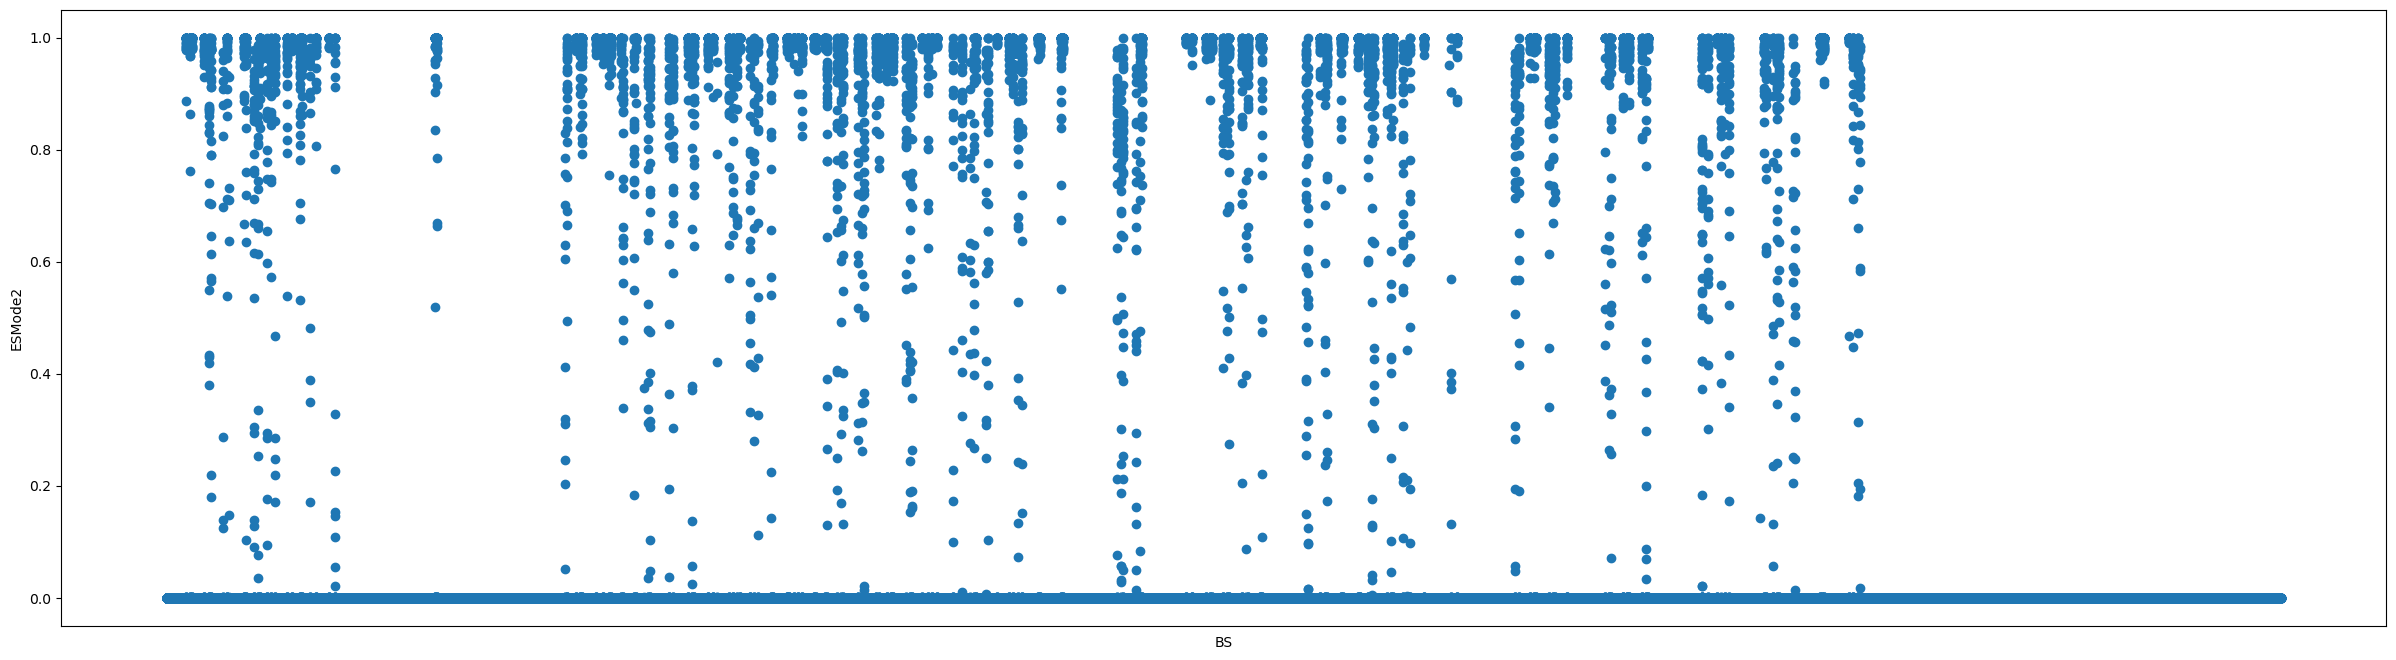

In [44]:
# ESMode2

plt.figure(figsize=(30, 8))
plt.scatter(esmodes['BS'], esmodes['ESMode2'])
plt.xlabel('BS')
plt.xticks([])
plt.ylabel('ESMode2')
plt.show()

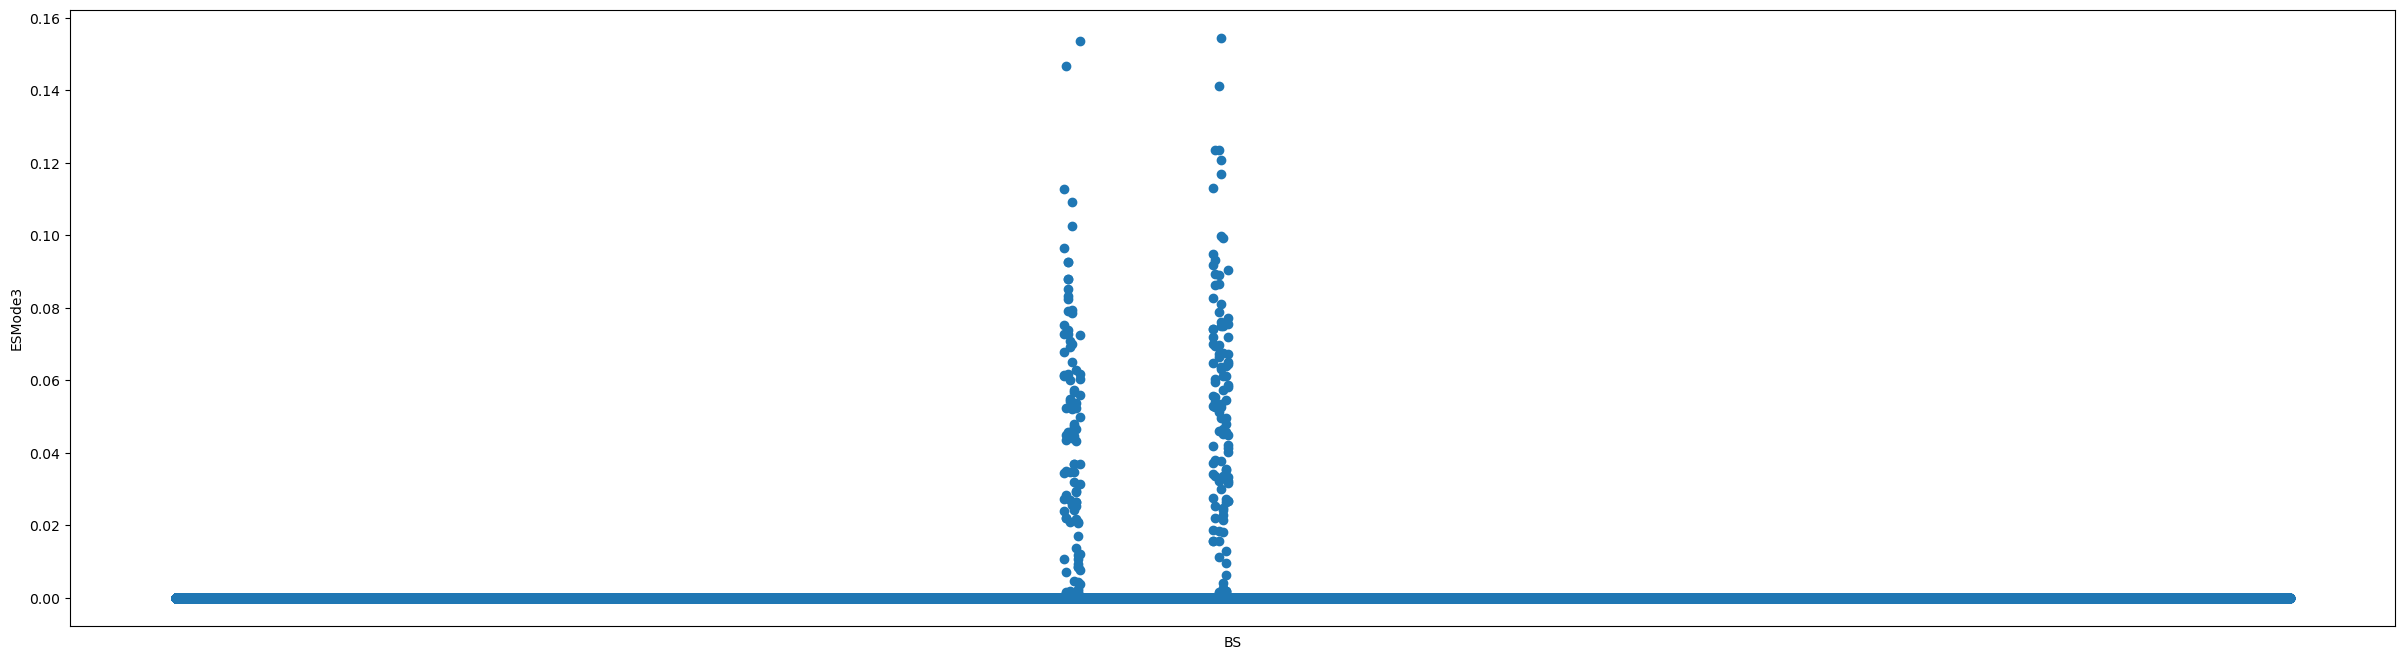

In [45]:
# ESMode3

plt.figure(figsize=(30, 8))
plt.scatter(esmodes['BS'], esmodes['ESMode3'])
plt.xlabel('BS')
plt.xticks([])
plt.ylabel('ESMode3')
plt.show()

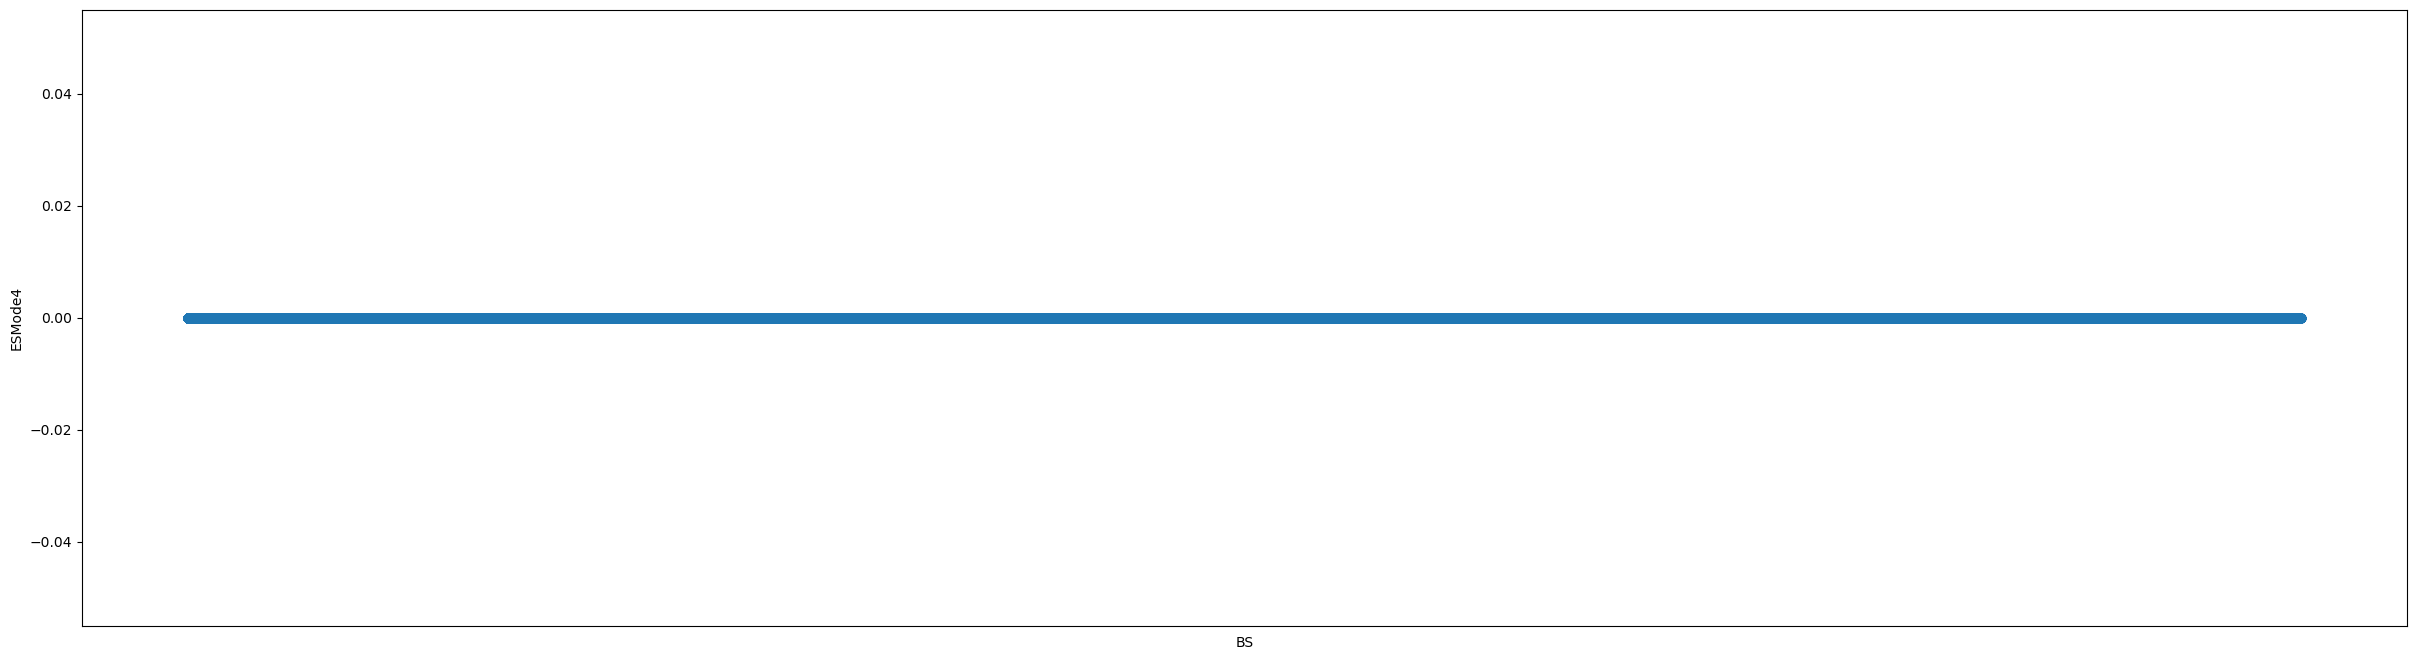

In [46]:
# ESMode4

plt.figure(figsize=(30, 8))
plt.scatter(esmodes['BS'], esmodes['ESMode4'])
plt.xlabel('BS')
plt.xticks([])
plt.ylabel('ESMode4')
plt.show()

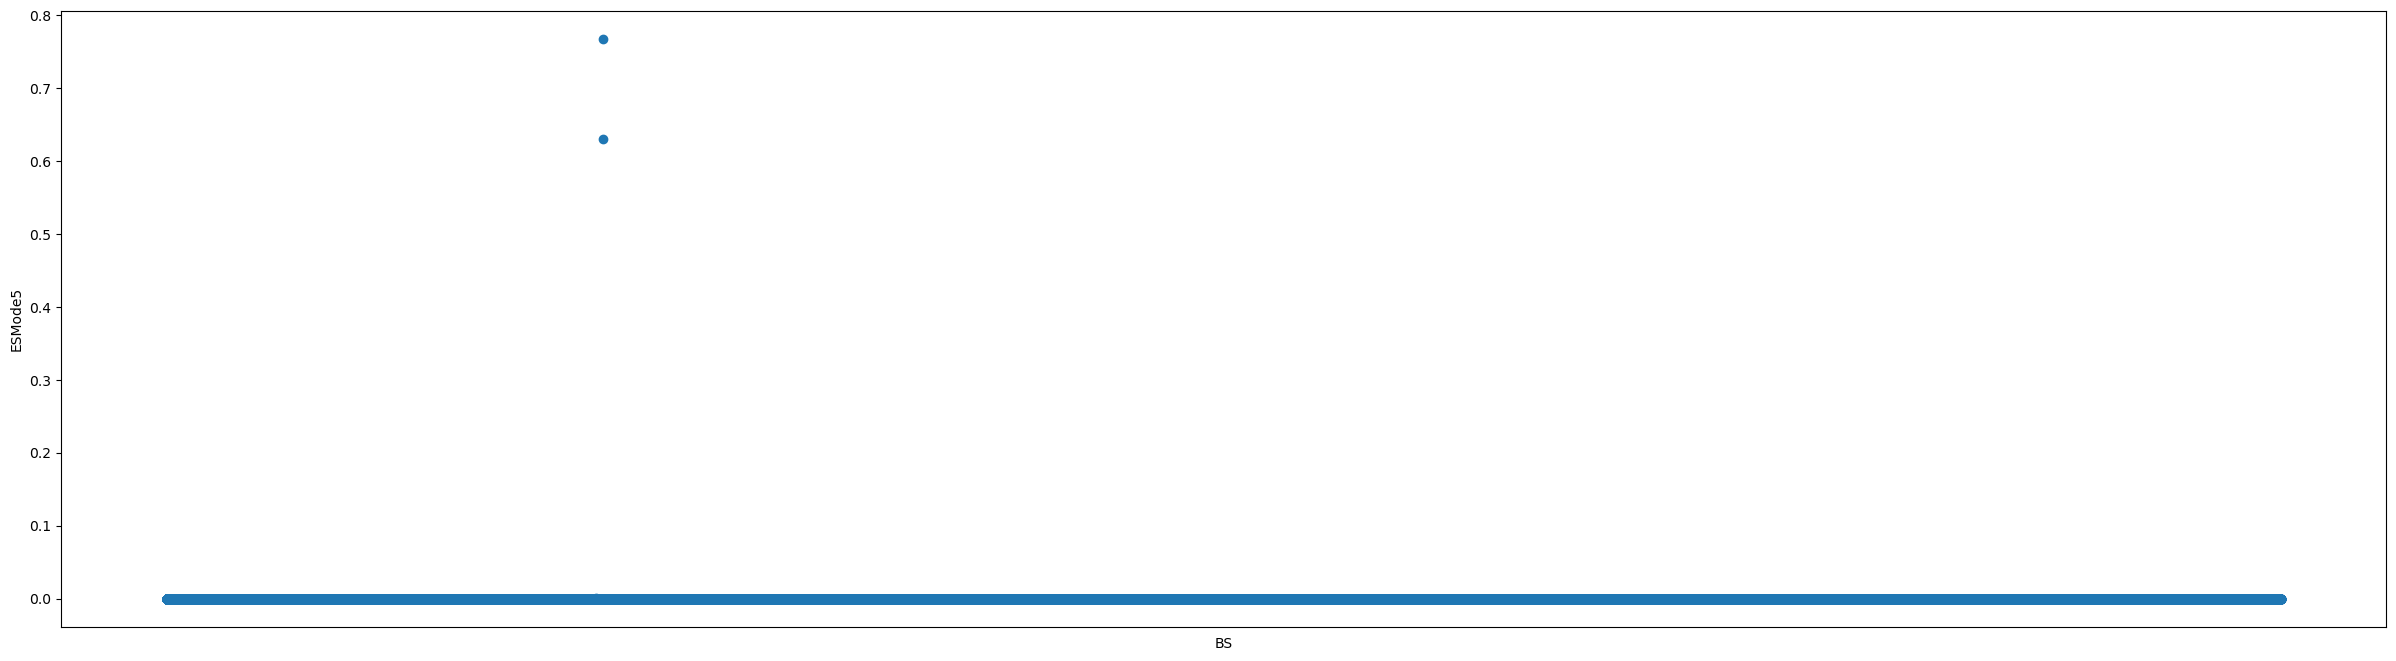

In [47]:
# ESMode5

plt.figure(figsize=(30, 8))
plt.scatter(esmodes['BS'], esmodes['ESMode5'])
plt.xlabel('BS')
plt.xticks([])
plt.ylabel('ESMode5')
plt.show()

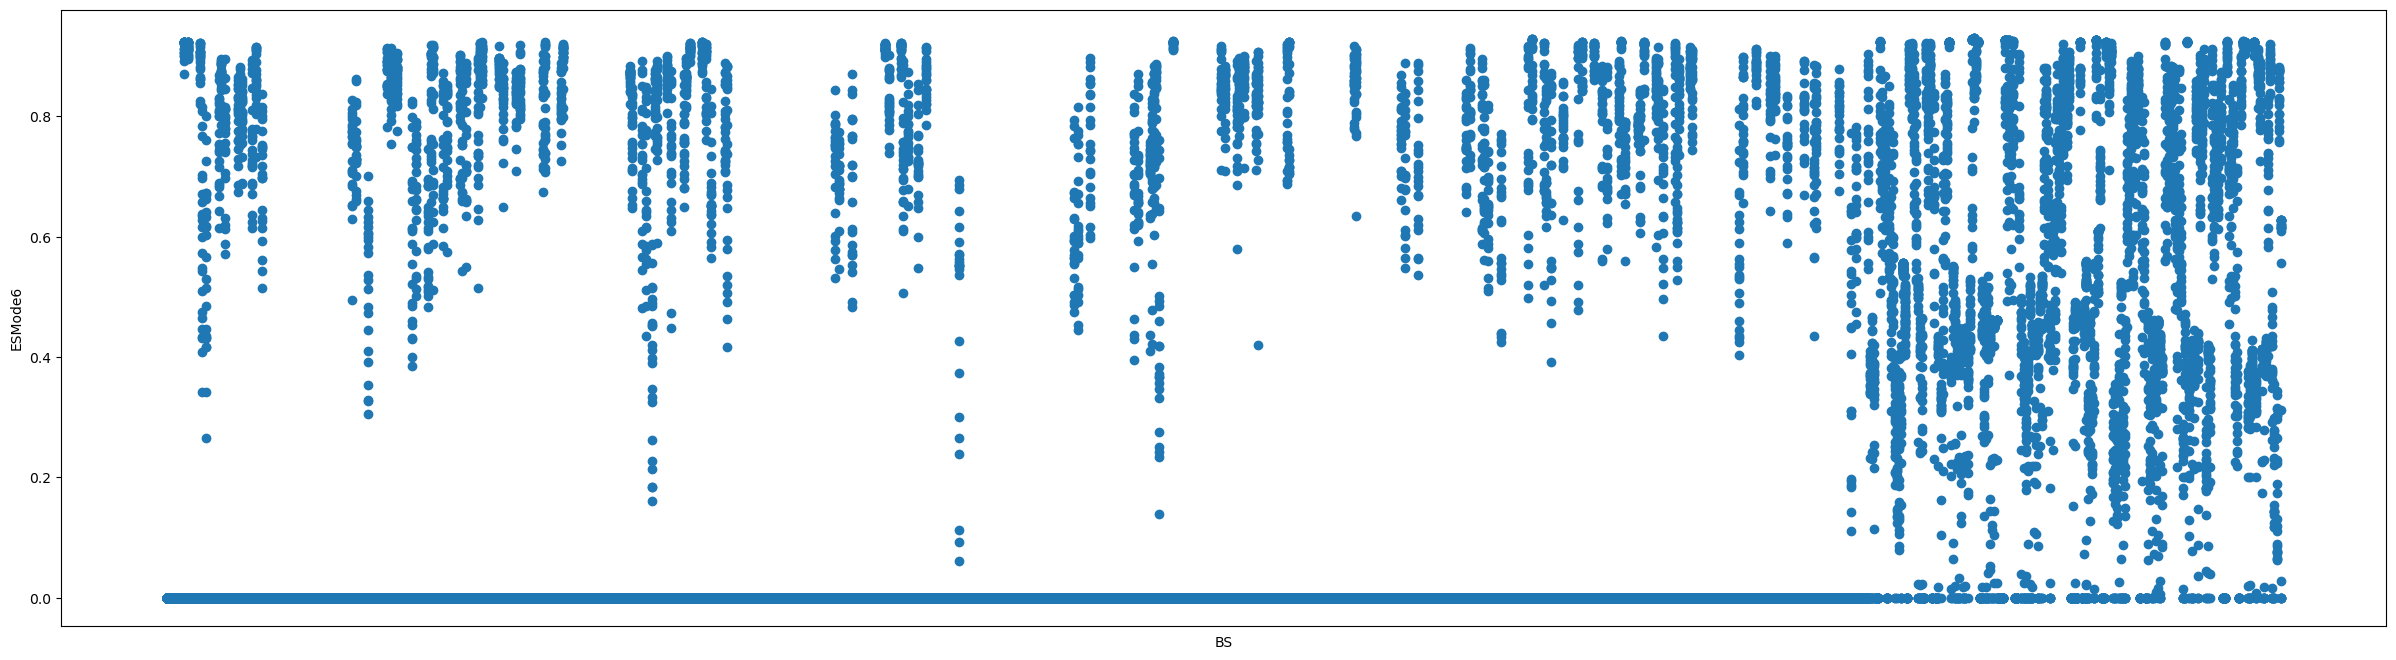

In [48]:
# ESMode6

plt.figure(figsize=(30, 8))
plt.scatter(esmodes['BS'], esmodes['ESMode6'])
plt.xlabel('BS')
plt.xticks([])
plt.ylabel('ESMode6')
plt.show()

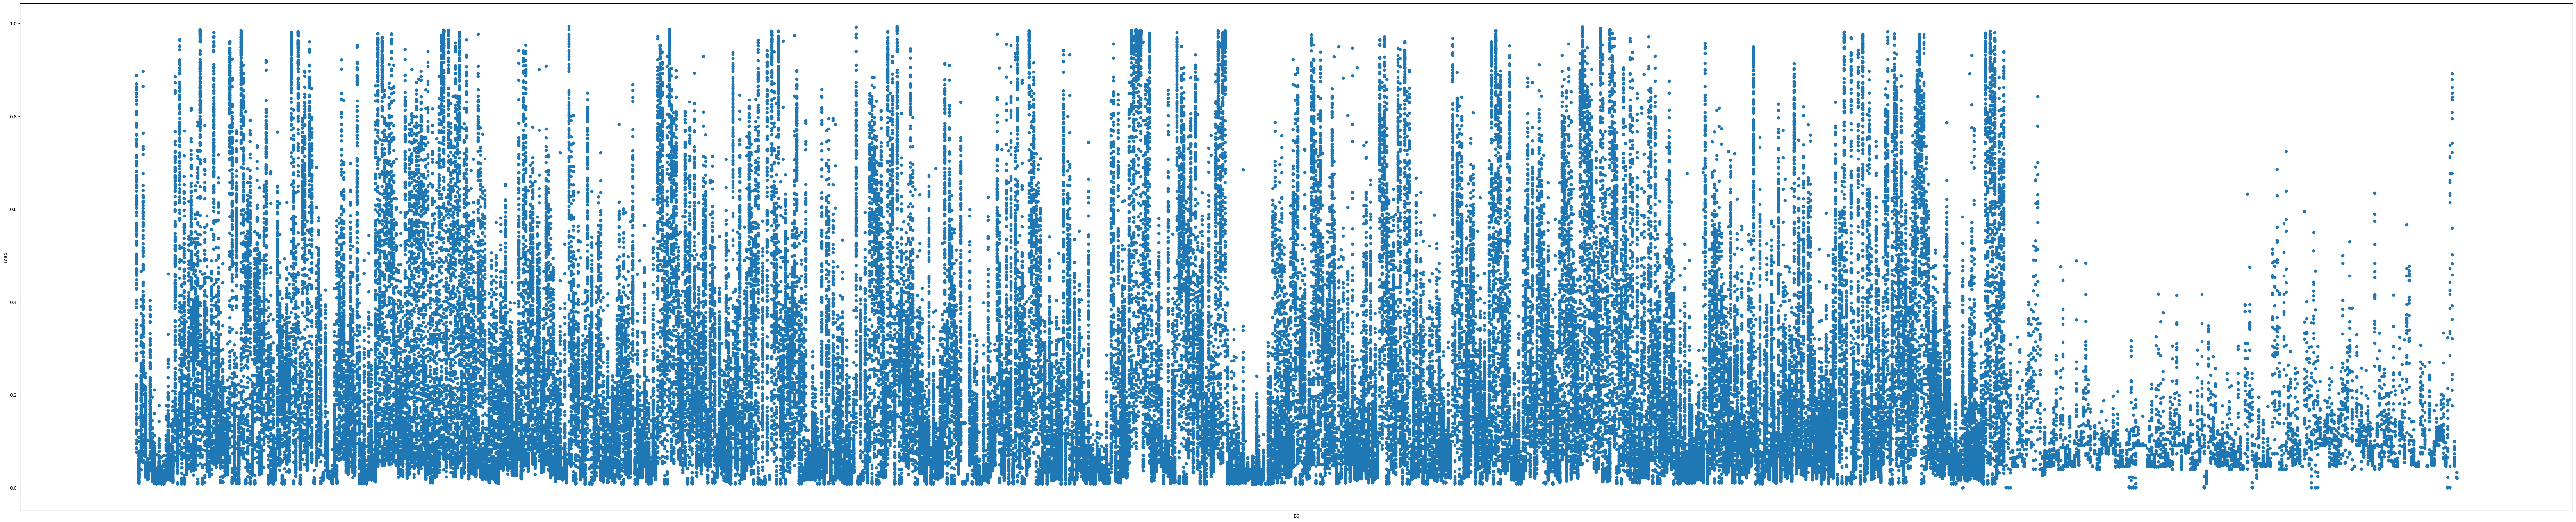

In [49]:
# load over BS

plt.figure(figsize=(100, 20))
plt.scatter(esmodes['BS'], esmodes['load'])
plt.xlabel('BS')
plt.xticks([])
plt.ylabel('Load')
plt.show()

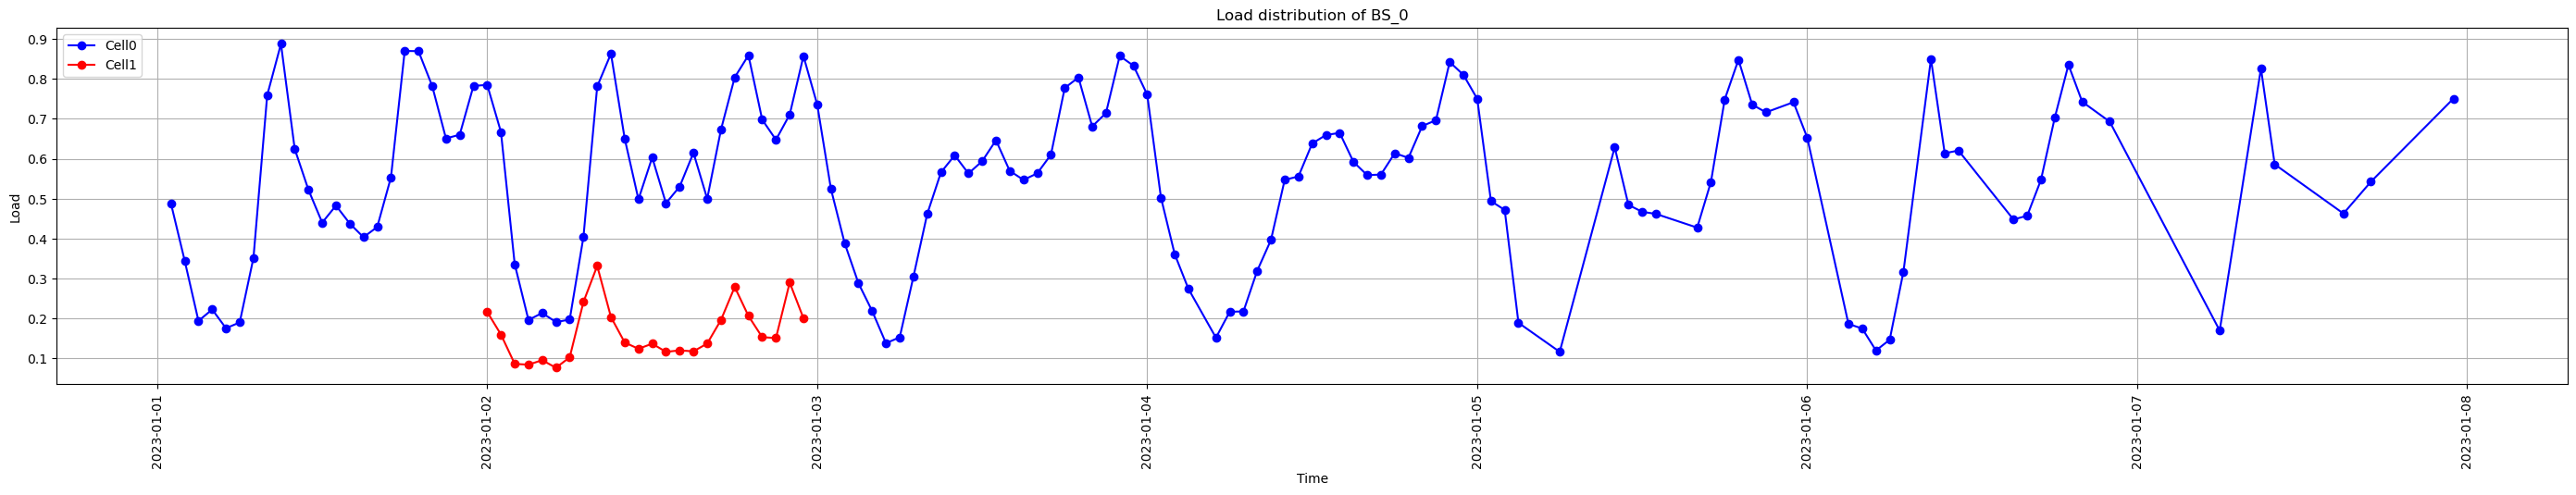

In [50]:
load_B_0_cell0 = esmodes[(esmodes['BS']=="B_0") & (esmodes['CellName']=="Cell0")]
load_B_0_cell1 = esmodes[(esmodes['BS']=="B_0") & (esmodes['CellName']=="Cell1")]


plt.figure(figsize=(35, 5))
plt.plot(load_B_0_cell0['Time'],load_B_0_cell0['load'], marker='o', linestyle='-', color='b', label='Cell0')
plt.plot(load_B_0_cell1['Time'],load_B_0_cell1['load'], marker='o', linestyle='-', color='r', label='Cell1')
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Load')
plt.grid(True)
plt.title('Load distribution of BS_0')
plt.show()

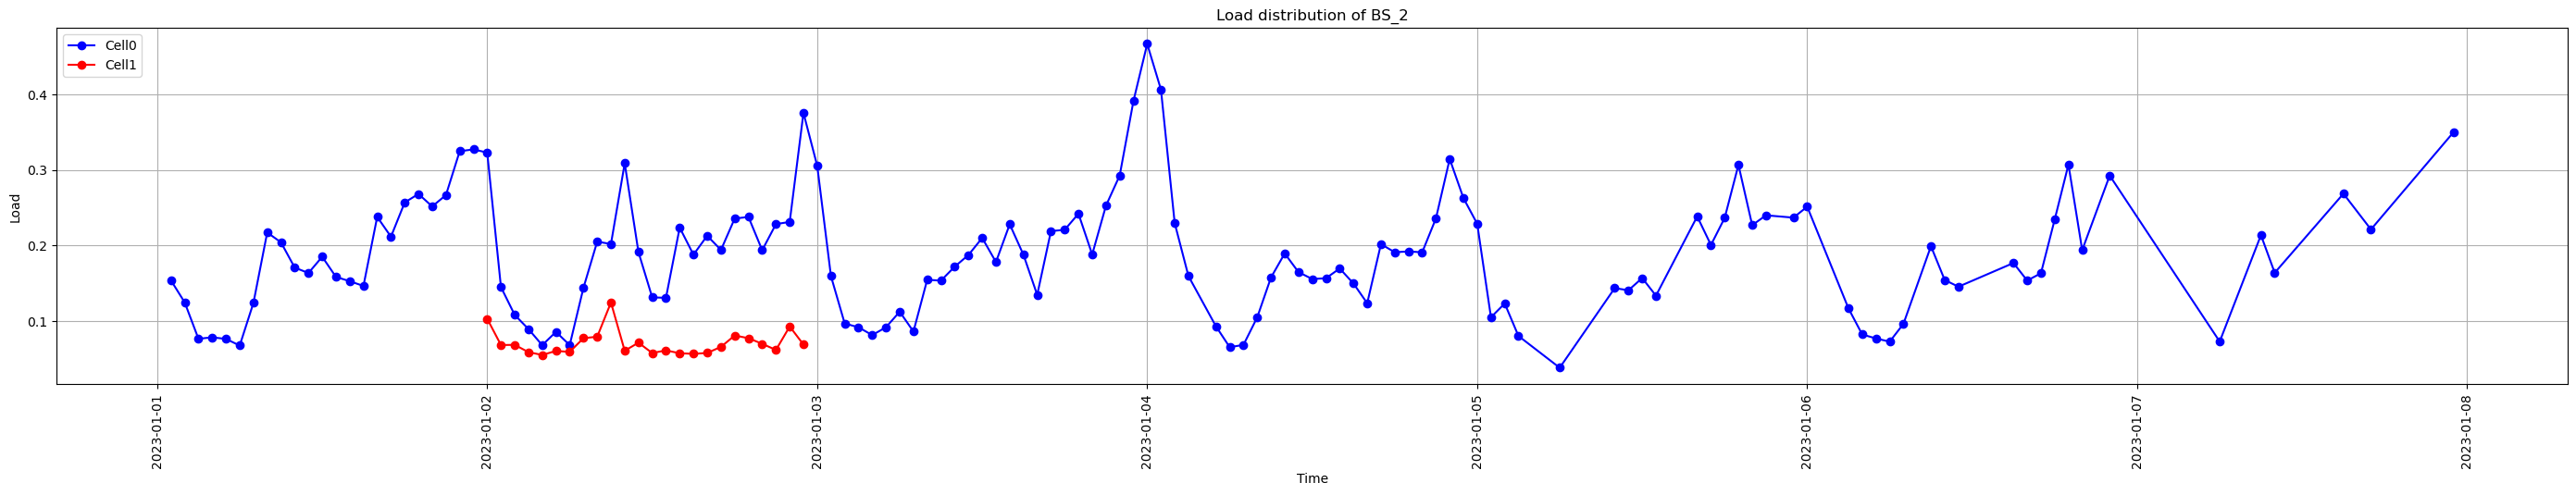

In [51]:
load_B_2_cell0 = esmodes[(esmodes['BS']=="B_2") & (esmodes['CellName']=="Cell0")]
load_B_2_cell1 = esmodes[(esmodes['BS']=="B_2") & (esmodes['CellName']=="Cell1")]


plt.figure(figsize=(35, 5))
plt.plot(load_B_2_cell0['Time'],load_B_2_cell0['load'], marker='o', linestyle='-', color='b', label='Cell0')
plt.plot(load_B_2_cell1['Time'],load_B_2_cell1['load'], marker='o', linestyle='-', color='r', label='Cell1')
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Load')
plt.grid(True)
plt.title('Load distribution of BS_2')
plt.show()

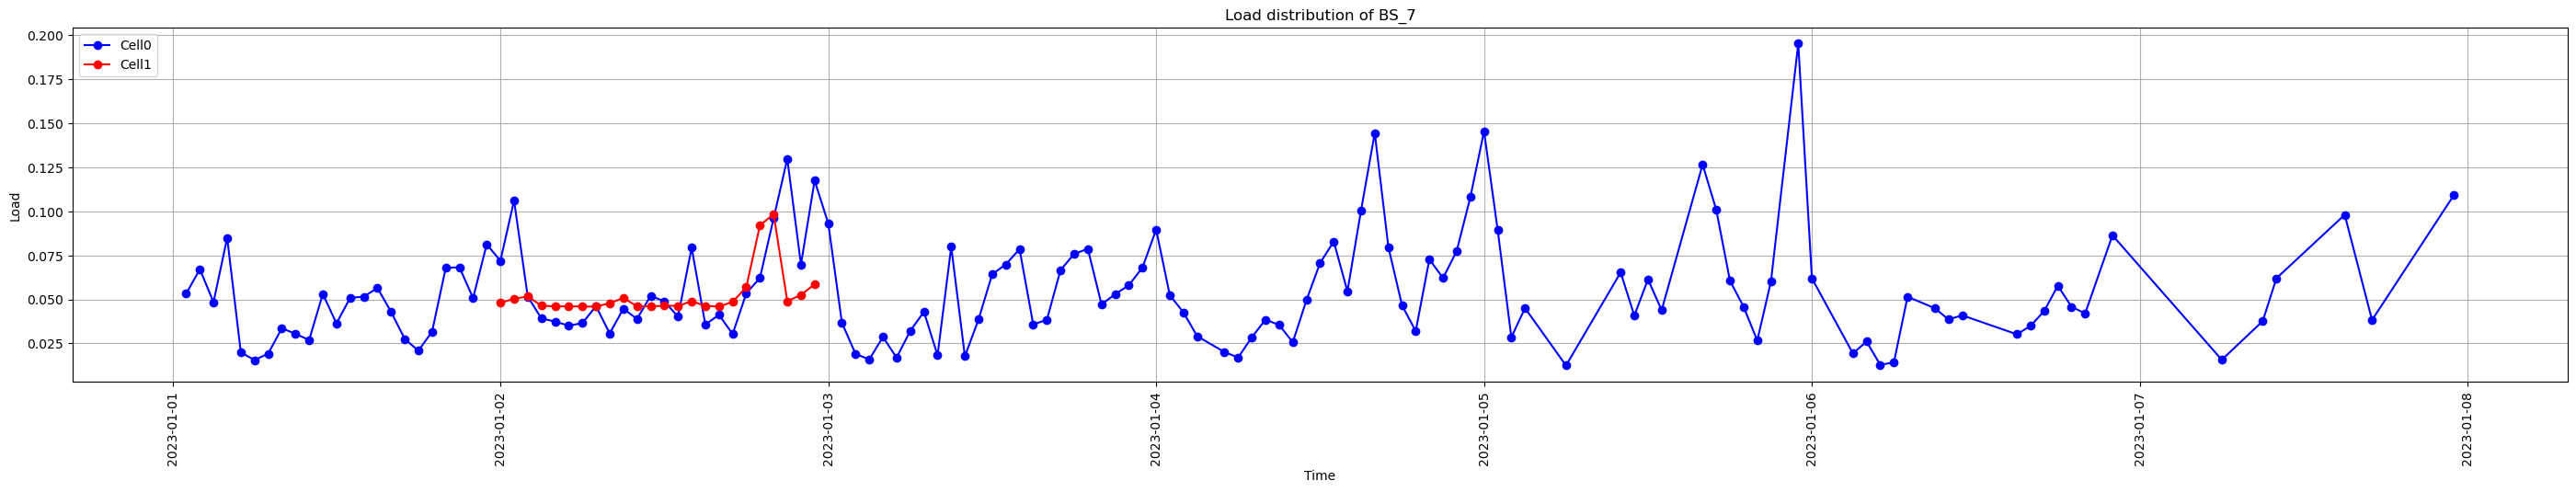

In [52]:
load_B_7_cell0 = esmodes[(esmodes['BS']=="B_7") & (esmodes['CellName']=="Cell0")]
load_B_7_cell1 = esmodes[(esmodes['BS']=="B_7") & (esmodes['CellName']=="Cell1")]


plt.figure(figsize=(35, 5))
plt.plot(load_B_7_cell0['Time'],load_B_7_cell0['load'], marker='o', linestyle='-', color='b', label='Cell0')
plt.plot(load_B_7_cell1['Time'],load_B_7_cell1['load'], marker='o', linestyle='-', color='r', label='Cell1')
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Load')
plt.grid(True)
plt.title('Load distribution of BS_7')
plt.show()

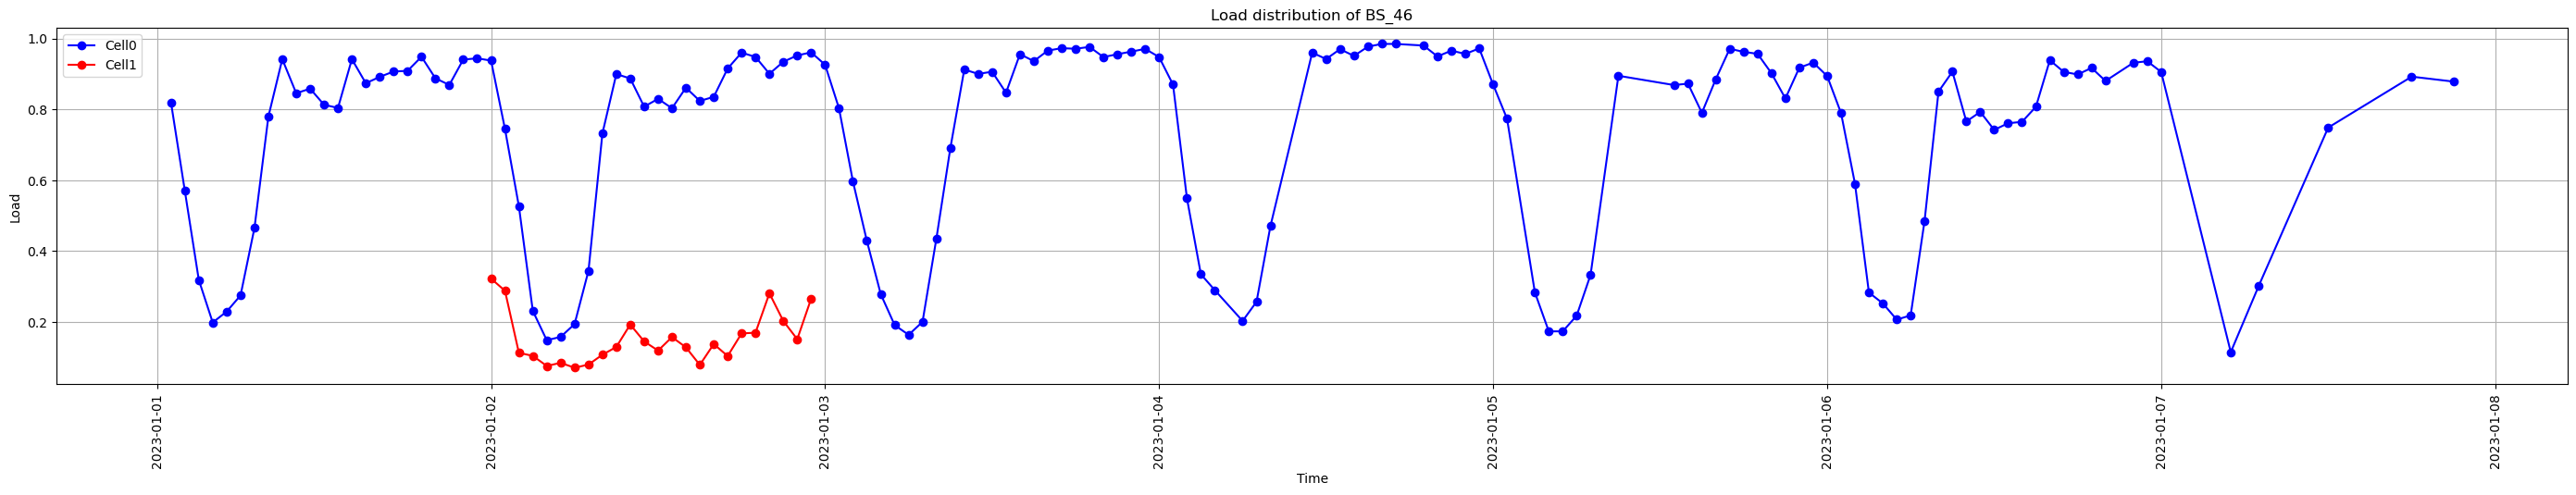

In [53]:
load_B_46_cell0 = esmodes[(esmodes['BS']=="B_46") & (esmodes['CellName']=="Cell0")]
load_B_46_cell1 = esmodes[(esmodes['BS']=="B_46") & (esmodes['CellName']=="Cell1")]


plt.figure(figsize=(35, 5))
plt.plot(load_B_46_cell0['Time'],load_B_46_cell0['load'], marker='o', linestyle='-', color='b', label='Cell0')
plt.plot(load_B_46_cell1['Time'],load_B_46_cell1['load'], marker='o', linestyle='-', color='r', label='Cell1')
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Load')
plt.grid(True)
plt.title('Load distribution of BS_46')
plt.show()

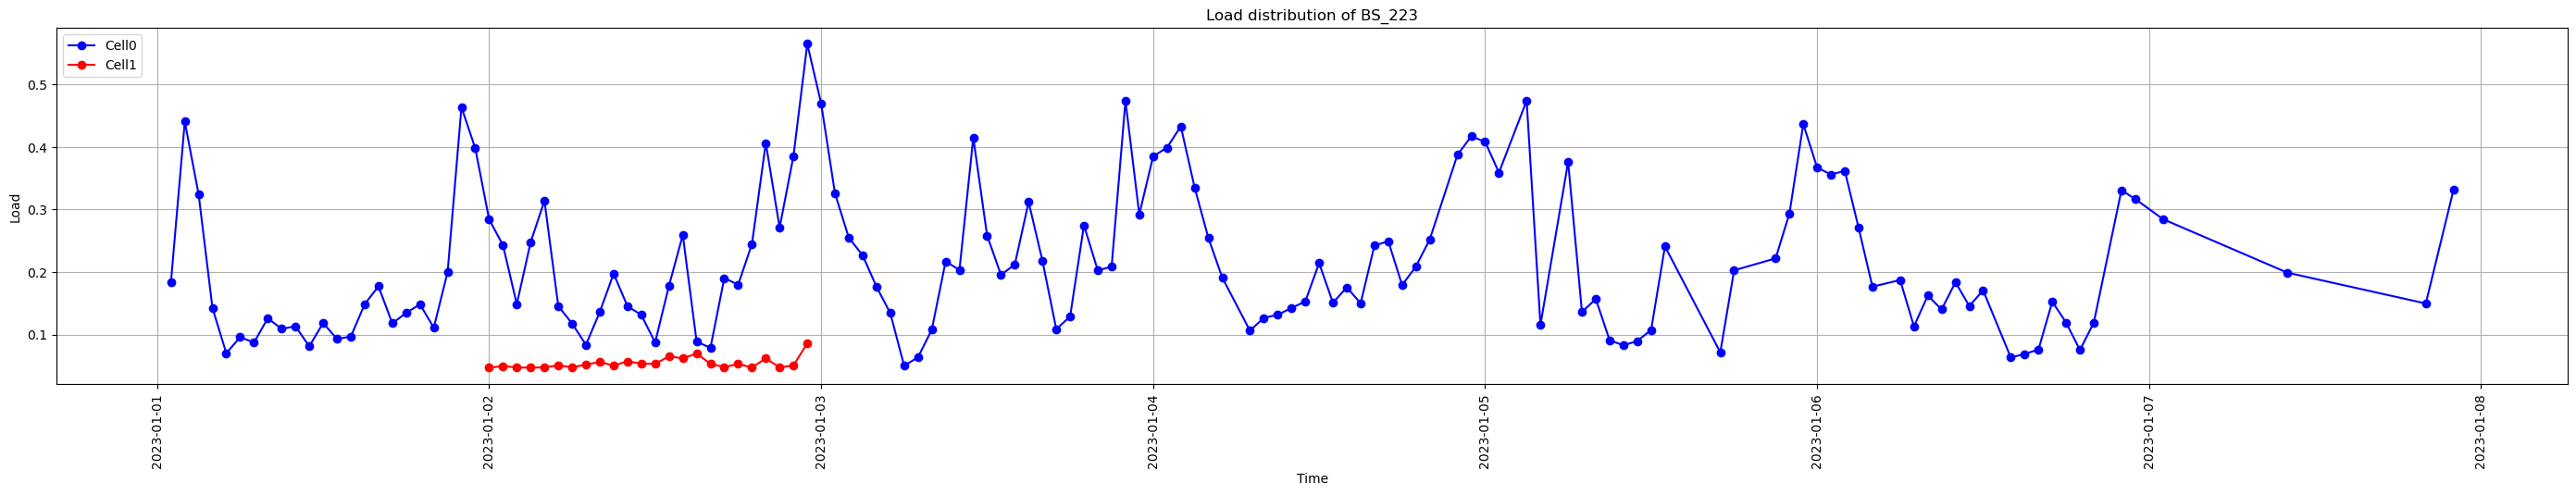

In [54]:
load_B_223_cell0 = esmodes[(esmodes['BS']=="B_223") & (esmodes['CellName']=="Cell0")]
load_B_223_cell1 = esmodes[(esmodes['BS']=="B_223") & (esmodes['CellName']=="Cell1")]


plt.figure(figsize=(35, 5))
plt.plot(load_B_223_cell0['Time'],load_B_223_cell0['load'], marker='o', linestyle='-', color='b', label='Cell0')
plt.plot(load_B_223_cell1['Time'],load_B_223_cell1['load'], marker='o', linestyle='-', color='r', label='Cell1')
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Load')
plt.grid(True)
plt.title('Load distribution of BS_223')
plt.show()

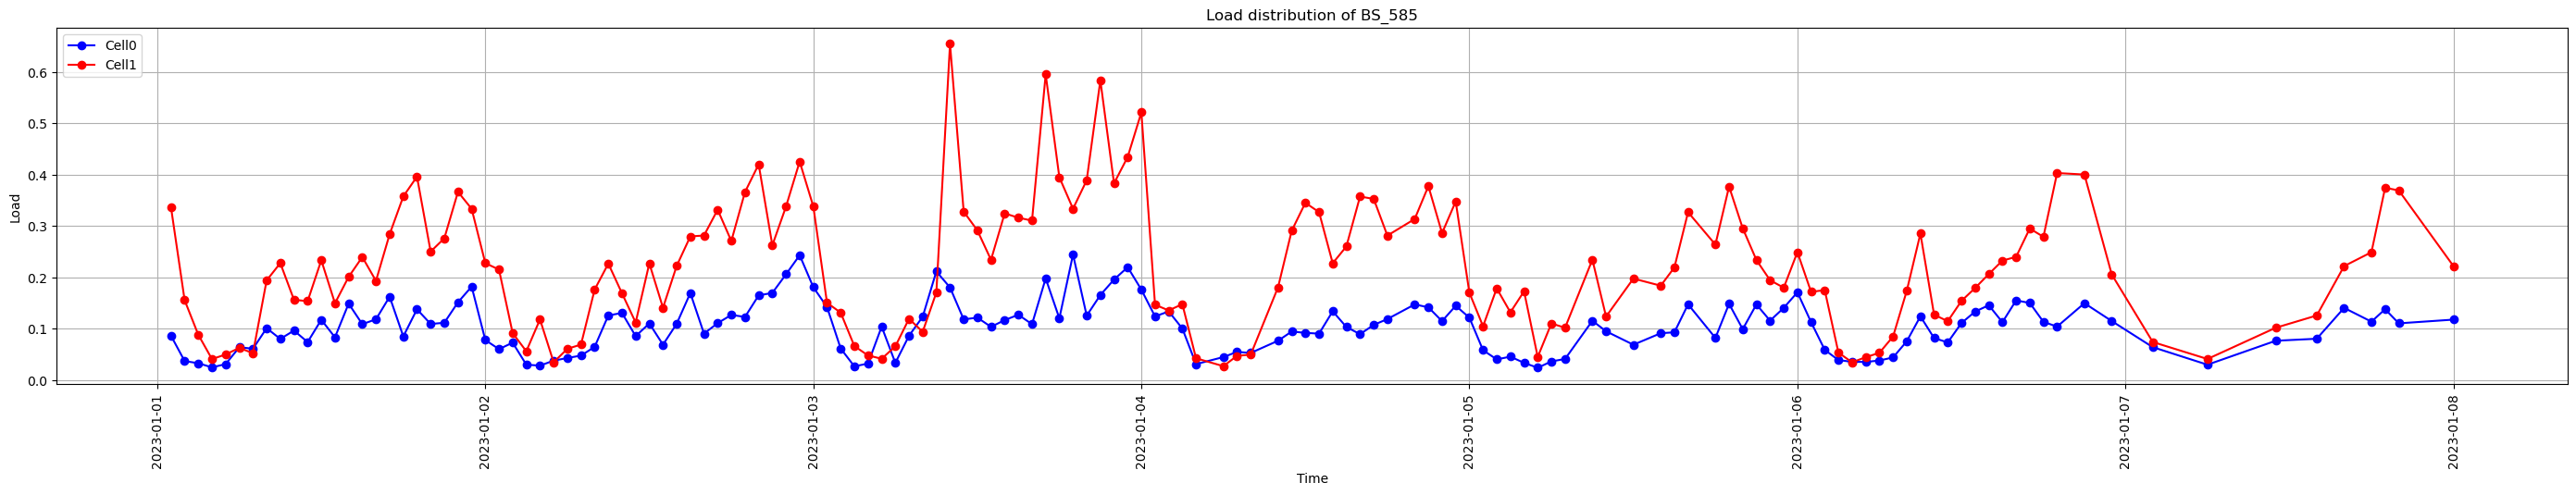

In [55]:
load_B_585_cell0 = esmodes[(esmodes['BS']=="B_585") & (esmodes['CellName']=="Cell0")]
load_B_585_cell1 = esmodes[(esmodes['BS']=="B_585") & (esmodes['CellName']=="Cell1")]


plt.figure(figsize=(35, 5))
plt.plot(load_B_585_cell0['Time'],load_B_585_cell0['load'], marker='o', linestyle='-', color='b', label='Cell0')
plt.plot(load_B_585_cell1['Time'],load_B_585_cell1['load'], marker='o', linestyle='-', color='r', label='Cell1')
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Load')
plt.grid(True)
plt.title('Load distribution of BS_585')
plt.show()

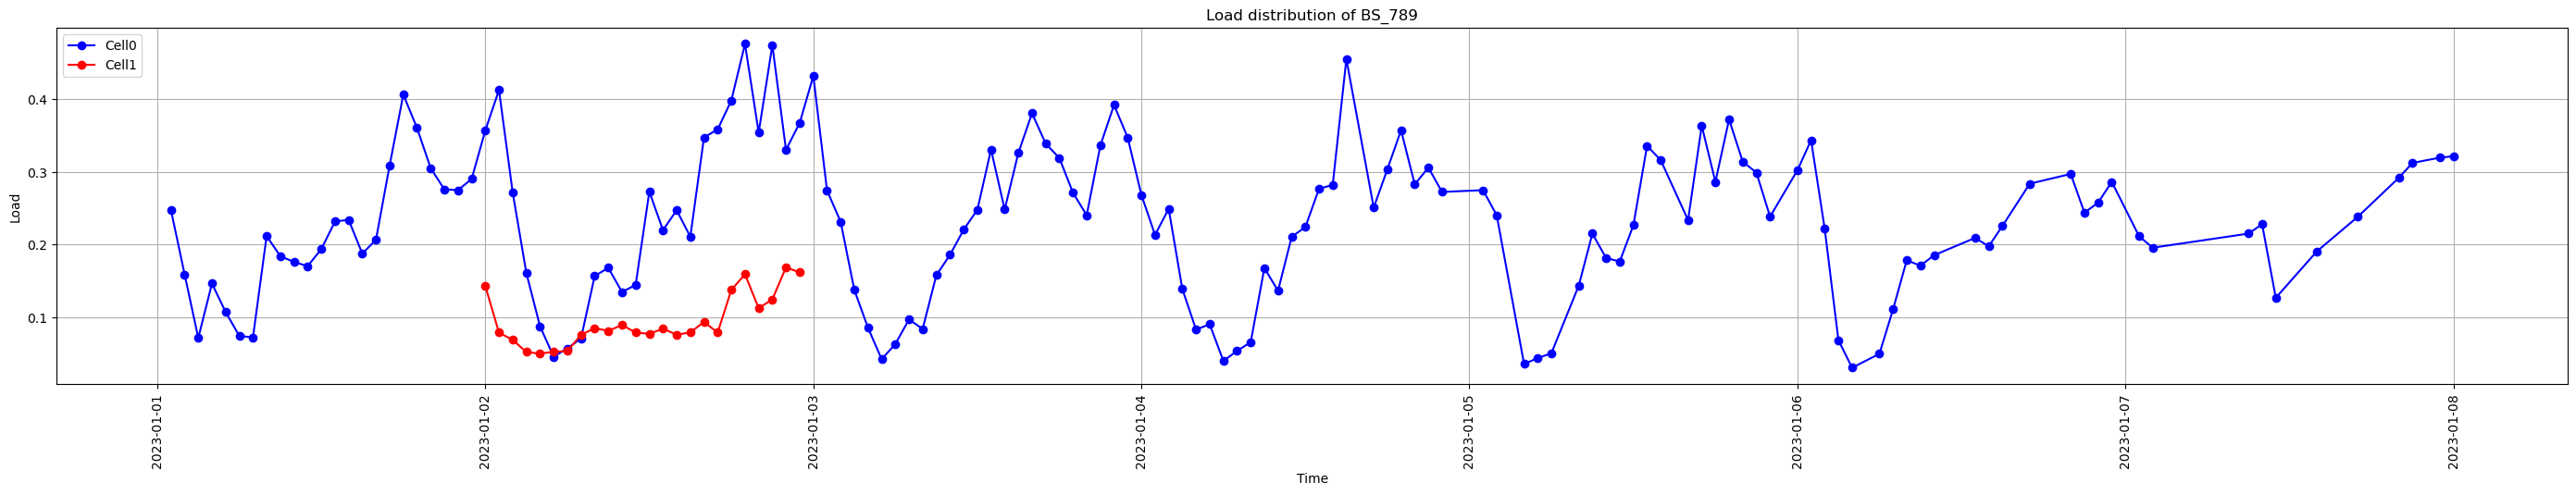

In [56]:
load_B_789_cell0 = esmodes[(esmodes['BS']=="B_789") & (esmodes['CellName']=="Cell0")]
load_B_789_cell1 = esmodes[(esmodes['BS']=="B_789") & (esmodes['CellName']=="Cell1")]


plt.figure(figsize=(35, 5))
plt.plot(load_B_789_cell0['Time'],load_B_789_cell0['load'], marker='o', linestyle='-', color='b', label='Cell0')
plt.plot(load_B_789_cell1['Time'],load_B_789_cell1['load'], marker='o', linestyle='-', color='r', label='Cell1')
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Load')
plt.grid(True)
plt.title('Load distribution of BS_789')
plt.show()

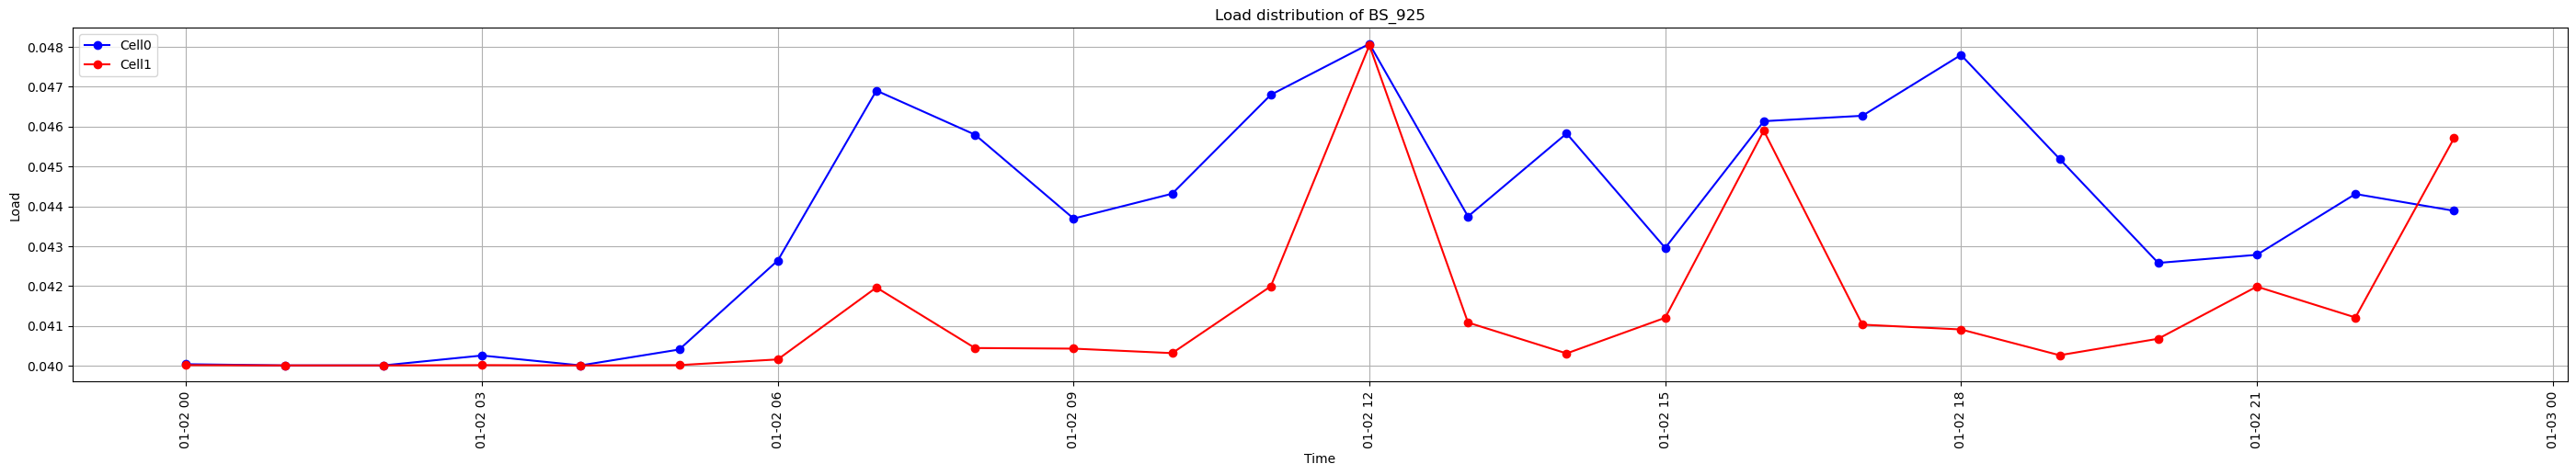

In [57]:
load_B_925_cell0 = esmodes[(esmodes['BS']=="B_925") & (esmodes['CellName']=="Cell0")]
load_B_925_cell1 = esmodes[(esmodes['BS']=="B_925") & (esmodes['CellName']=="Cell1")]


plt.figure(figsize=(35, 5))
plt.plot(load_B_925_cell0['Time'],load_B_925_cell0['load'], marker='o', linestyle='-', color='b', label='Cell0')
plt.plot(load_B_925_cell1['Time'],load_B_925_cell1['load'], marker='o', linestyle='-', color='r', label='Cell1')
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Load')
plt.grid(True)
plt.title('Load distribution of BS_925')
plt.show()

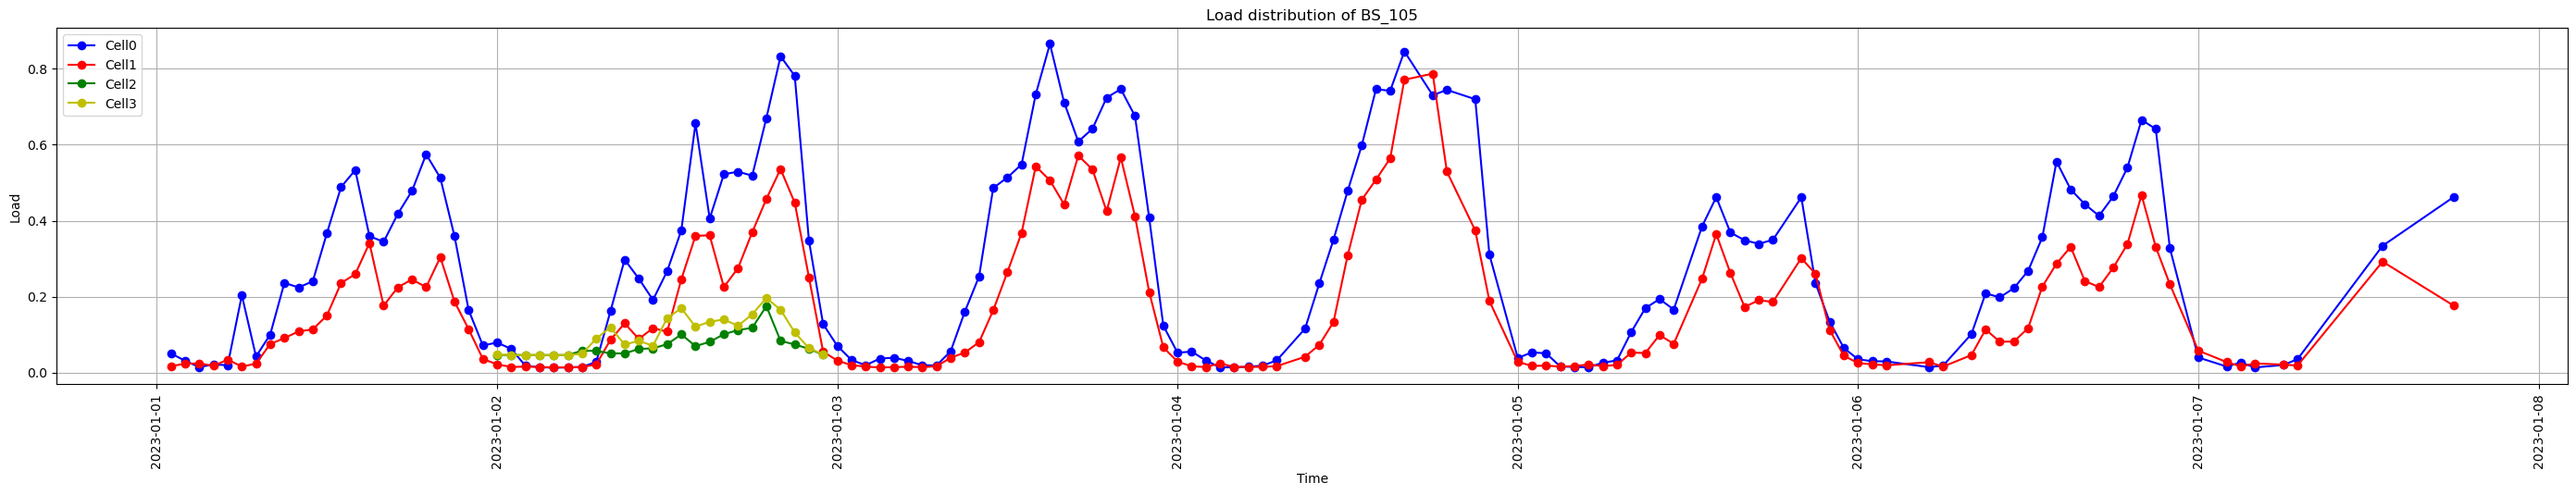

In [58]:
load_B_105_cell0 = esmodes[(esmodes['BS']=="B_105") & (esmodes['CellName']=="Cell0")]
load_B_105_cell1 = esmodes[(esmodes['BS']=="B_105") & (esmodes['CellName']=="Cell1")]
load_B_105_cell2 = esmodes[(esmodes['BS']=="B_105") & (esmodes['CellName']=="Cell2")]
load_B_105_cell3 = esmodes[(esmodes['BS']=="B_105") & (esmodes['CellName']=="Cell3")]

plt.figure(figsize=(35, 5))
plt.plot(load_B_105_cell0['Time'],load_B_105_cell0['load'], marker='o', linestyle='-', color='b', label='Cell0')
plt.plot(load_B_105_cell1['Time'],load_B_105_cell1['load'], marker='o', linestyle='-', color='r', label='Cell1')
plt.plot(load_B_105_cell2['Time'],load_B_105_cell2['load'], marker='o', linestyle='-', color='g', label='Cell2')
plt.plot(load_B_105_cell3['Time'],load_B_105_cell3['load'], marker='o', linestyle='-', color='y', label='Cell3')
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Load')
plt.grid(True)
plt.title('Load distribution of BS_105')
plt.show()

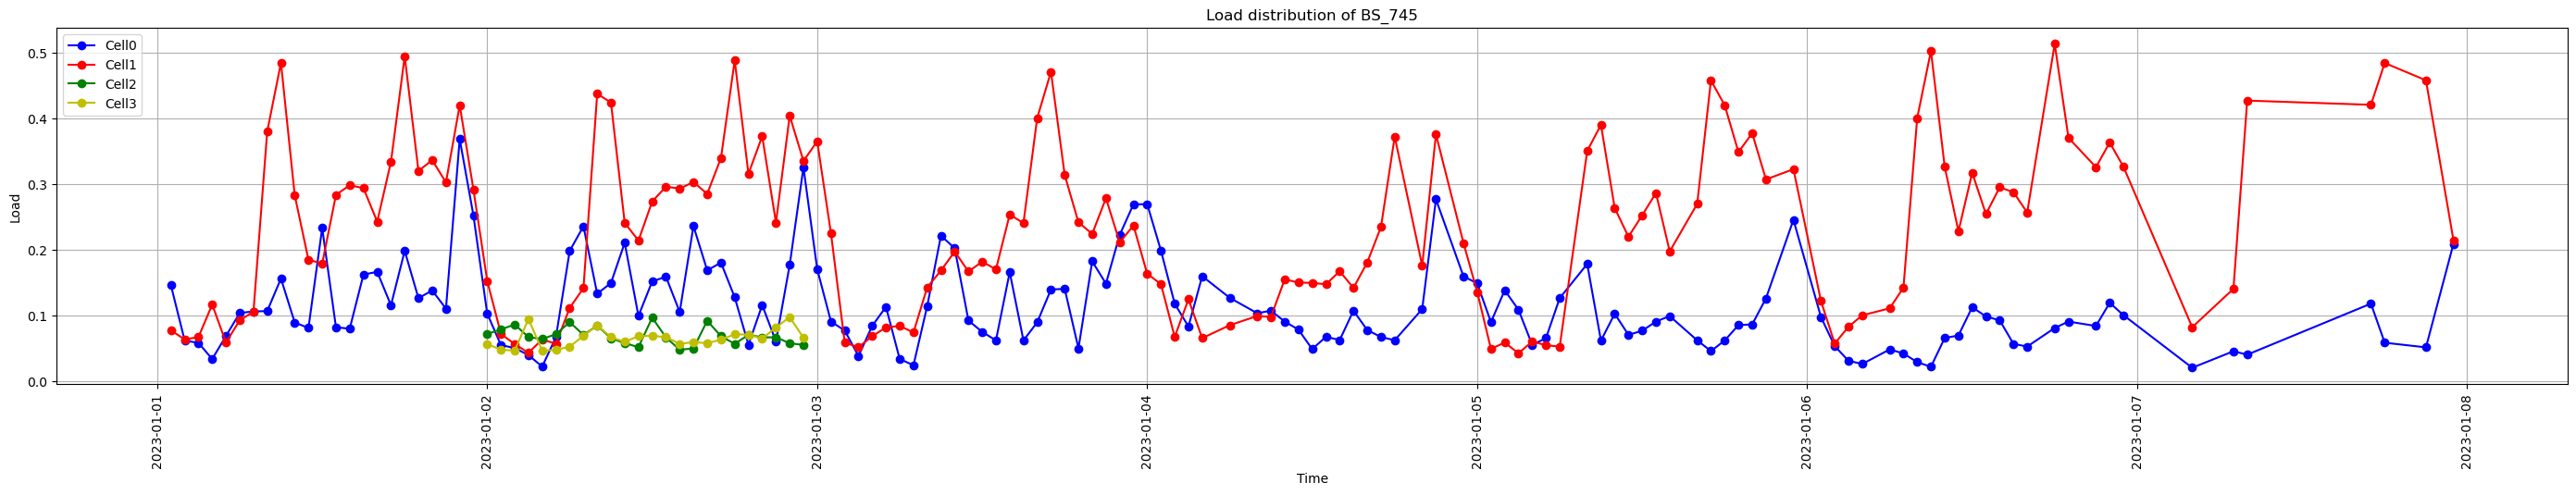

In [59]:
load_B_745_cell0 = esmodes[(esmodes['BS']=="B_745") & (esmodes['CellName']=="Cell0")]
load_B_745_cell1 = esmodes[(esmodes['BS']=="B_745") & (esmodes['CellName']=="Cell1")]
load_B_745_cell2 = esmodes[(esmodes['BS']=="B_745") & (esmodes['CellName']=="Cell2")]
load_B_745_cell3 = esmodes[(esmodes['BS']=="B_745") & (esmodes['CellName']=="Cell3")]

plt.figure(figsize=(35, 5))
plt.plot(load_B_745_cell0['Time'],load_B_745_cell0['load'], marker='o', linestyle='-', color='b', label='Cell0')
plt.plot(load_B_745_cell1['Time'],load_B_745_cell1['load'], marker='o', linestyle='-', color='r', label='Cell1')
plt.plot(load_B_745_cell2['Time'],load_B_745_cell2['load'], marker='o', linestyle='-', color='g', label='Cell2')
plt.plot(load_B_745_cell3['Time'],load_B_745_cell3['load'], marker='o', linestyle='-', color='y', label='Cell3')
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Load')
plt.grid(True)
plt.title('Load distribution of BS_745')
plt.show()

In [60]:
# # plot a sns heatmap over Time and BS where intensity represents the load

# plt.figure(figsize=(20, 20))
# sns.heatmap(esmodes[esmodes['BS']=='B_0'].pivot_table(index='Time', columns='CellName', values='load'), cmap='crest')

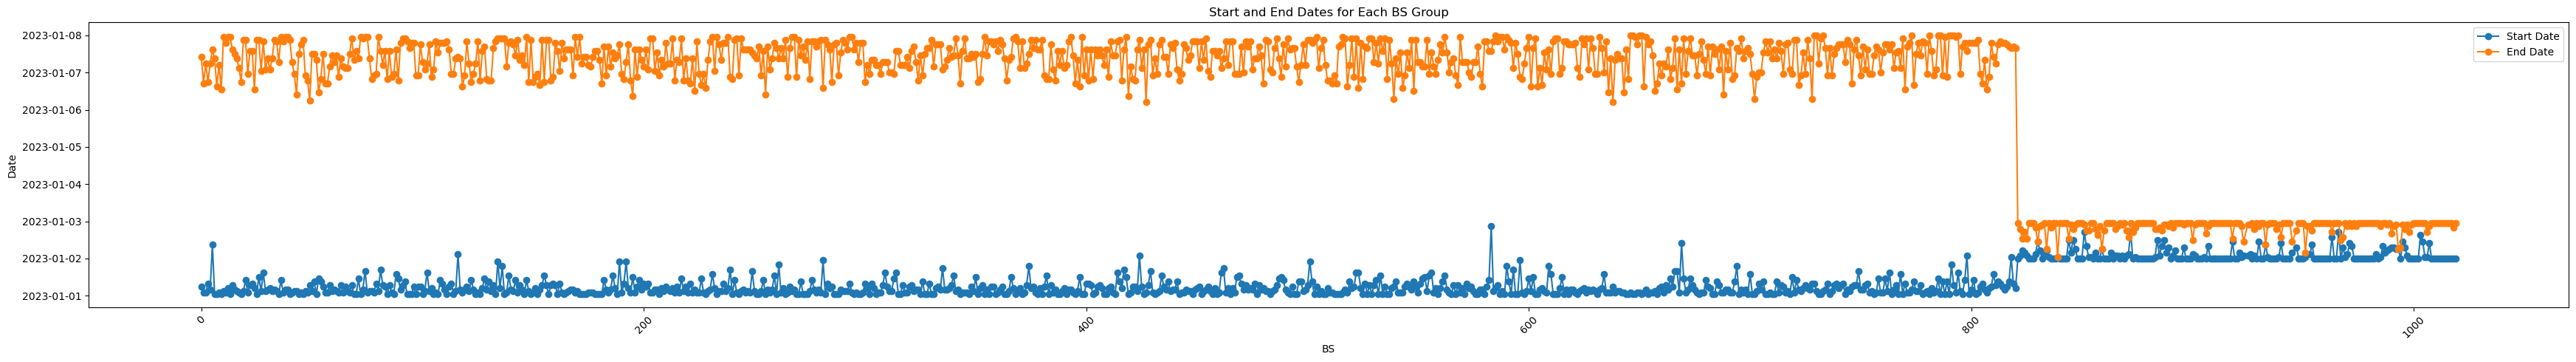

BS               start                 end
0        0 2023-01-01 06:00:00 2023-01-07 10:00:00
1        1 2023-01-01 02:00:00 2023-01-06 17:00:00
2        2 2023-01-01 02:00:00 2023-01-07 06:00:00
3        3 2023-01-01 08:00:00 2023-01-06 18:00:00
4        4 2023-01-01 04:00:00 2023-01-07 06:00:00
...    ...                 ...                 ...
1013  1015 2023-01-02 00:00:00 2023-01-02 23:00:00
1014  1016 2023-01-02 00:00:00 2023-01-02 23:00:00
1015  1017 2023-01-02 00:00:00 2023-01-02 23:00:00
1016  1018 2023-01-02 00:00:00 2023-01-02 20:00:00
1017  1019 2023-01-02 00:00:00 2023-01-02 23:00:00

[1018 rows x 3 columns]

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
submit = pd.read_csv("PCprediction.csv")
# Remove 'B_' prefix and convert 'BS' values to integers
submit['BS'] = submit['BS'].str.replace('B_', '').astype(int)
# Convert the 'Time' column to datetime format
submit['Time'] = pd.to_datetime(submit['Time'])

# Group by 'BS' column and calculate start and end dates
grouped = submit.groupby('BS')['Time'].agg(['min', 'max']).reset_index()
grouped.rename(columns={'min': 'start', 'max': 'end'}, inplace=True)

# Create a line graph
plt.figure(figsize=(35, 5))
plt.plot(grouped['BS'], grouped['start'], marker='o', label='Start Date')
plt.plot(grouped['BS'], grouped['end'], marker='o', label='End Date')
plt.xlabel('BS')
plt.ylabel('Date')
plt.title('Start and End Dates for Each BS Group')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

grouped